In [1]:
import os
import pickle
import gzip

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import spearmanr
from sklearn.preprocessing import MinMaxScaler
from tqdm import tqdm

In [2]:
os.chdir('../..')

In [3]:
from src.data.constants import PUNCTUATION

In [4]:
pd.options.display.max_columns = None

## 1. LIME final results

### AG News

In [3]:
with open('data/external/latest_kirill/bert_lime_agnews_dev_500.pkl.gz', 'rb') as f:
    j = gzip.decompress(f.read())
results = pickle.loads(j)
print('loaded saved results', 'bert_lime_agnews_dev_500')

loaded saved results bert_lime_agnews_dev_500


In [4]:
vault = []

for i, info in tqdm(results.items()):
    for perturbation in info:
        pinfo = info[perturbation]
        if type(pinfo) != dict:
#            print(i, info, perturbation, pinfo)
            continue
        if 'spearman' not in pinfo:
            continue
        if 'orig_tokens' not in pinfo:
            continue
        vault += [dict(
            index=i,
            pinfo=pinfo,
            perturbation=perturbation,
            sentence_orig=pinfo['sentence_orig'],
            sentence=pinfo['sentence'],
            explanation=pinfo['exp'],
            topk=pinfo['top_5_intersect'],
            spearman=pinfo['spearman'],
        )]

100%|██████████| 500/500 [00:00<00:00, 151659.82it/s]


In [5]:
vault_df = pd.DataFrame(vault)
print(vault_df.shape)
vault_df.head()

(263, 8)


,index,pinfo,perturbation,sentence_orig,sentence,explanation,topk,spearman
0,3,"{'exp': ([0.02628033962395682, 0.0249729507793...",change_first_name,Carlos Moya fired Spain into a 1-0 lead over t...,Benjamin Moya fired Spain into a 1 - 0 lead ov...,"([0.02628033962395682, 0.024972950779348226, 0...",0.0,0.660924
1,3,"{'exp': ([0.013392993035378336, 0.013379367087...",change_location,Carlos Moya fired Spain into a 1-0 lead over t...,Carlos Moya fired Brazil into a 1 - 0 lead ove...,"([0.013392993035378336, 0.013379367087513475, ...",0.0,0.653959
2,4,"{'exp': ([0.030516356280780546, 0.029117648957...",change_first_name,"AFP - The US ambassador to the United Nations,...",AFP - The US ambassador to the United Nations ...,"([0.030516356280780546, 0.029117648957660343, ...",0.0,0.727179
3,5,"{'exp': ([0.018164803643643146, 0.016407397661...",change_first_name,Napster creator Shawn Fanning introduces a new...,Napster creator Bryan Fanning introduces a new...,"([0.018164803643643146, 0.016407397661215208, ...",0.6,0.870588
4,7,"{'exp': ([0.15877570402778937, 0.1354821376513...",change_first_name,The ousting of fund president Sean Harrigan fr...,The ousting of fund president Jack Harrigan fr...,"([0.15877570402778937, 0.13548213765131656, 0....",0.4,0.706035


In [6]:
# vault_df.drop(columns=['sentence_orig', 'sentence', 'explanation'], inplace=True)

In [7]:
kirill_results = pd.json_normalize(vault_df['pinfo'])
print(kirill_results.shape)
kirill_results.head()

(263, 11)


,exp,top_5_intersect,orig_indices,orig_scores,orig_tokens,perturb_scores,perturb_tokens,spearman,sentence,sentence_orig,top_10_intersect
0,"([0.02628033962395682, 0.024972950779348226, 0...",0.0,"[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13,...","[0.005229465681393416, -0.0007607108047106108,...","[Carlos, Moya, fired, Spain, into, a, 1, 0, le...","[-0.013256046454071422, 0.007438931678029559, ...","[Benjamin, Moya, fired, Spain, into, a, 1, 0, ...",0.660924,Benjamin Moya fired Spain into a 1 - 0 lead ov...,Carlos Moya fired Spain into a 1-0 lead over t...,NaN
1,"([0.013392993035378336, 0.013379367087513475, ...",0.0,"[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13,...","[0.005229465681393416, -0.0007607108047106108,...","[Carlos, Moya, fired, Spain, into, a, 1, 0, le...","[-0.0015703062169127658, -0.005415503656280367...","[Carlos, Moya, fired, Brazil, into, a, 1, 0, l...",0.653959,Carlos Moya fired Brazil into a 1 - 0 lead ove...,Carlos Moya fired Spain into a 1-0 lead over t...,NaN
2,"([0.030516356280780546, 0.029117648957660343, ...",0.0,"[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13,...","[0.017100397391516427, 0.005569419615978492, 0...","[AFP, The, US, ambassador, to, the, United, Na...","[0.029117648957660343, 0.0005235262086188998, ...","[AFP, The, US, ambassador, to, the, United, Na...",0.727179,AFP - The US ambassador to the United Nations ...,"AFP - The US ambassador to the United Nations,...",NaN
3,"([0.018164803643643146, 0.016407397661215208, ...",0.6,"[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13,...","[0.008280906429008682, 0.010161664957088468, 0...","[Napster, creator, Shawn, Fanning, introduces,...","[0.016407397661215208, 0.018164803643643146, -...","[Napster, creator, Bryan, Fanning, introduces,...",0.870588,Napster creator Bryan Fanning introduces a new...,Napster creator Shawn Fanning introduces a new...,NaN
4,"([0.15877570402778937, 0.13548213765131656, 0....",0.4,"[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13,...","[0.027899049346257147, -0.04881583395339655, 0...","[The, ousting, of, fund, president, Sean, Harr...","[0.017874416990315938, -0.060515470244117874, ...","[The, ousting, of, fund, president, Jack, Harr...",0.706035,The ousting of fund president Jack Harrigan fr...,The ousting of fund president Sean Harrigan fr...,NaN


In [8]:
kirill_results = pd.concat(
    (kirill_results, vault_df[['index', 'perturbation']]),
    axis=1
)
print(kirill_results.shape)
kirill_results.head()

(263, 13)


,exp,top_5_intersect,orig_indices,orig_scores,orig_tokens,perturb_scores,perturb_tokens,spearman,sentence,sentence_orig,top_10_intersect,index,perturbation
0,"([0.02628033962395682, 0.024972950779348226, 0...",0.0,"[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13,...","[0.005229465681393416, -0.0007607108047106108,...","[Carlos, Moya, fired, Spain, into, a, 1, 0, le...","[-0.013256046454071422, 0.007438931678029559, ...","[Benjamin, Moya, fired, Spain, into, a, 1, 0, ...",0.660924,Benjamin Moya fired Spain into a 1 - 0 lead ov...,Carlos Moya fired Spain into a 1-0 lead over t...,NaN,3,change_first_name
1,"([0.013392993035378336, 0.013379367087513475, ...",0.0,"[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13,...","[0.005229465681393416, -0.0007607108047106108,...","[Carlos, Moya, fired, Spain, into, a, 1, 0, le...","[-0.0015703062169127658, -0.005415503656280367...","[Carlos, Moya, fired, Brazil, into, a, 1, 0, l...",0.653959,Carlos Moya fired Brazil into a 1 - 0 lead ove...,Carlos Moya fired Spain into a 1-0 lead over t...,NaN,3,change_location
2,"([0.030516356280780546, 0.029117648957660343, ...",0.0,"[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13,...","[0.017100397391516427, 0.005569419615978492, 0...","[AFP, The, US, ambassador, to, the, United, Na...","[0.029117648957660343, 0.0005235262086188998, ...","[AFP, The, US, ambassador, to, the, United, Na...",0.727179,AFP - The US ambassador to the United Nations ...,"AFP - The US ambassador to the United Nations,...",NaN,4,change_first_name
3,"([0.018164803643643146, 0.016407397661215208, ...",0.6,"[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13,...","[0.008280906429008682, 0.010161664957088468, 0...","[Napster, creator, Shawn, Fanning, introduces,...","[0.016407397661215208, 0.018164803643643146, -...","[Napster, creator, Bryan, Fanning, introduces,...",0.870588,Napster creator Bryan Fanning introduces a new...,Napster creator Shawn Fanning introduces a new...,NaN,5,change_first_name
4,"([0.15877570402778937, 0.13548213765131656, 0....",0.4,"[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13,...","[0.027899049346257147, -0.04881583395339655, 0...","[The, ousting, of, fund, president, Sean, Harr...","[0.017874416990315938, -0.060515470244117874, ...","[The, ousting, of, fund, president, Jack, Harr...",0.706035,The ousting of fund president Jack Harrigan fr...,The ousting of fund president Sean Harrigan fr...,NaN,7,change_first_name


In [9]:
kirill_results.drop(['exp', 'top_5_intersect', 'orig_indices', 'spearman', 'sentence', 'top_10_intersect'], axis=1, inplace=True)

In [10]:
k = 5

kirill_results['top_k_idx_orig'] = kirill_results.apply(
    lambda x: 
    set(
        np.argsort(
            -np.abs(x[f'orig_scores'])  # abs to ignore direction of importance value
        )[:k]
    ), 
    axis=1
)
kirill_results['top_k_idx_perturb'] = kirill_results.apply(
    lambda x: 
    set(
        np.argsort(
            -np.abs(x[f'perturb_scores'])
        )[:k]
    ), 
    axis=1
)

kirill_results['k_intersection'] = kirill_results.apply(lambda x: len(x['top_k_idx_orig'].intersection(x['top_k_idx_perturb'])) / k, axis=1)

kirill_results['spearman'] = kirill_results.apply(lambda x: spearmanr(x['orig_scores'], x[f'perturb_scores'])[0], axis=1)

In [27]:
comb = kirill_results.groupby('perturbation')['k_intersection'].mean().reset_index().merge(
    kirill_results.groupby('perturbation')['k_intersection'].std().reset_index(),
    on='perturbation'
)
comb['label']= np.round(comb['k_intersection_x'], 2).astype(str) + ' ± ' + np.round(comb['k_intersection_y'], 2).astype(str)
comb

,perturbation,k_intersection_x,k_intersection_y,label
0,add_typo,0.742857,0.145255,0.74 ± 0.15
1,change_first_name,0.736842,0.219601,0.74 ± 0.22
2,change_last_name,0.733333,0.159545,0.73 ± 0.16
3,change_location,0.646667,0.255604,0.65 ± 0.26
4,contraction,0.600000,NaN,0.6 ± nan
5,remove_all_punct,0.705882,0.232172,0.71 ± 0.23
6,remove_commas,0.746154,0.200461,0.75 ± 0.2
7,strip_punct,0.722581,0.223174,0.72 ± 0.22
8,swap_adj,0.700000,0.141421,0.7 ± 0.14
9,switch_gender,0.400000,0.163299,0.4 ± 0.16


In [28]:
comb = kirill_results.groupby('perturbation')['spearman'].mean().reset_index().merge(
    kirill_results.groupby('perturbation')['spearman'].std().reset_index(),
    on='perturbation'
)
comb['label']= np.round(comb['spearman_x'], 2).astype(str) + ' ± ' + np.round(comb['spearman_y'], 2).astype(str)
comb

,perturbation,spearman_x,spearman_y,label
0,add_typo,0.696599,0.196148,0.7 ± 0.2
1,change_first_name,0.711645,0.134822,0.71 ± 0.13
2,change_last_name,0.714404,0.137864,0.71 ± 0.14
3,change_location,0.676410,0.161163,0.68 ± 0.16
4,contraction,0.858442,NaN,0.86 ± nan
5,remove_all_punct,0.672587,0.188320,0.67 ± 0.19
6,remove_commas,0.750746,0.163238,0.75 ± 0.16
7,strip_punct,0.721536,0.202272,0.72 ± 0.2
8,swap_adj,0.726444,0.142593,0.73 ± 0.14
9,switch_gender,0.524178,0.173928,0.52 ± 0.17


In [16]:
kirill_results.groupby('perturbation')['k_intersection'].count()

perturbation
add_typo             14
change_first_name    76
change_last_name     45
change_location      30
contraction           1
remove_all_punct     34
remove_commas        26
strip_punct          31
swap_adj              2
switch_gender         4
Name: k_intersection, dtype: int64

### SST

In [3]:
with open('data/external/latest_kirill/bert_lime_sst_dev_500.pkl.gz', 'rb') as f:
    j = gzip.decompress(f.read())
results = pickle.loads(j)

In [4]:
vault = []

for i, info in tqdm(results.items()):
    for perturbation in info:
        pinfo = info[perturbation]
        if type(pinfo) != dict:
#            print(i, info, perturbation, pinfo)
            continue
        if 'spearman' not in pinfo:
            continue
        if 'orig_tokens' not in pinfo:
            continue
        vault += [dict(
            index=i,
            pinfo=pinfo,
            perturbation=perturbation,
            sentence_orig=pinfo['sentence_orig'],
            sentence=pinfo['sentence'],
            explanation=pinfo['exp'],
            topk=pinfo['top_5_intersect'],
            spearman=pinfo['spearman'],
        )]

100%|██████████| 500/500 [00:00<00:00, 161393.87it/s]


In [5]:
vault_df = pd.DataFrame(vault)
print(vault_df.shape)
vault_df.head()

(687, 8)


,index,pinfo,perturbation,sentence_orig,sentence,explanation,topk,spearman
0,5,"{'exp': ([0.11935536069294368, 0.1151401247756...",strip_punct,"( Lawrence bounces ) all over the stage , danc...","( lawrence bounces ) all over the stage , danc...","([0.11935536069294368, 0.11514012477569698, 0....",0.8,0.986087
1,5,"{'exp': ([0.15623125585936928, 0.1395827860277...",remove_commas,"( Lawrence bounces ) all over the stage , danc...",( lawrence bounces ) all over the stage danci...,"([0.15623125585936928, 0.13958278602775442, 0....",0.6,0.928696
2,5,"{'exp': ([0.1541473711310857, 0.13993620051037...",remove_all_punct,"( Lawrence bounces ) all over the stage , danc...",lawrence bounces all over the stage dancing...,"([0.1541473711310857, 0.13993620051037606, 0.0...",0.6,0.899130
3,5,"{'exp': ([0.12425742123855417, 0.1218721940375...",change_first_name,"( Lawrence bounces ) all over the stage , danc...","( David bounces ) all over the stage , dancing...","([0.12425742123855417, 0.1218721940375114, 0.0...",0.8,0.990435
4,6,"{'exp': ([0.06189154253603851, 0.0545155142054...",strip_punct,It 's a remarkably solid and subtly satirical ...,it ' s a remarkably solid and subtly satirical...,"([0.06189154253603851, 0.05451551420543605, 0....",0.4,0.754545


In [6]:
# vault_df.drop(columns=['sentence_orig', 'sentence', 'explanation'], inplace=True)

In [7]:
kirill_results = pd.json_normalize(vault_df['pinfo'])
print(kirill_results.shape)
kirill_results.head()

(687, 10)


,exp,top_5_intersect,orig_indices,orig_scores,orig_tokens,perturb_scores,perturb_tokens,spearman,sentence,sentence_orig
0,"([0.11935536069294368, 0.11514012477569698, 0....",0.8,"[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13,...","[-0.0422348143786807, -0.05516901087479692, 0....","[Lawrence, bounces, all, over, the, stage, dan...","[-0.04430807578197303, -0.05340747031070714, 0...","[lawrence, bounces, all, over, the, stage, dan...",0.986087,"( lawrence bounces ) all over the stage , danc...","( Lawrence bounces ) all over the stage , danc..."
1,"([0.15623125585936928, 0.13958278602775442, 0....",0.6,"[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13,...","[-0.0422348143786807, -0.05516901087479692, 0....","[Lawrence, bounces, all, over, the, stage, dan...","[-0.03444438711942043, -0.05161631694719572, 0...","[lawrence, bounces, all, over, the, stage, dan...",0.928696,( lawrence bounces ) all over the stage danci...,"( Lawrence bounces ) all over the stage , danc..."
2,"([0.1541473711310857, 0.13993620051037606, 0.0...",0.6,"[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13,...","[-0.0422348143786807, -0.05516901087479692, 0....","[Lawrence, bounces, all, over, the, stage, dan...","[-0.05085083404895343, -0.06003259943490336, 0...","[lawrence, bounces, all, over, the, stage, dan...",0.899130,lawrence bounces all over the stage dancing...,"( Lawrence bounces ) all over the stage , danc..."
3,"([0.12425742123855417, 0.1218721940375114, 0.0...",0.8,"[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13,...","[-0.0422348143786807, -0.05516901087479692, 0....","[Lawrence, bounces, all, over, the, stage, dan...","[-0.022136911794098938, -0.03962139956947861, ...","[David, bounces, all, over, the, stage, dancin...",0.990435,"( David bounces ) all over the stage , dancing...","( Lawrence bounces ) all over the stage , danc..."
4,"([0.06189154253603851, 0.05451551420543605, 0....",0.4,"[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10]","[-0.009560111320949855, 0.0056579475108381036,...","[It, s, a, remarkably, solid, and, subtly, sat...","[-0.0047334793772721715, 0.007464009468312571,...","[it, s, a, remarkably, solid, and, subtly, sat...",0.754545,it ' s a remarkably solid and subtly satirical...,It 's a remarkably solid and subtly satirical ...


In [8]:
kirill_results = pd.concat(
    (kirill_results, vault_df[['index', 'perturbation']]),
    axis=1
)
print(kirill_results.shape)
kirill_results.head()

(687, 12)


,exp,top_5_intersect,orig_indices,orig_scores,orig_tokens,perturb_scores,perturb_tokens,spearman,sentence,sentence_orig,index,perturbation
0,"([0.11935536069294368, 0.11514012477569698, 0....",0.8,"[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13,...","[-0.0422348143786807, -0.05516901087479692, 0....","[Lawrence, bounces, all, over, the, stage, dan...","[-0.04430807578197303, -0.05340747031070714, 0...","[lawrence, bounces, all, over, the, stage, dan...",0.986087,"( lawrence bounces ) all over the stage , danc...","( Lawrence bounces ) all over the stage , danc...",5,strip_punct
1,"([0.15623125585936928, 0.13958278602775442, 0....",0.6,"[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13,...","[-0.0422348143786807, -0.05516901087479692, 0....","[Lawrence, bounces, all, over, the, stage, dan...","[-0.03444438711942043, -0.05161631694719572, 0...","[lawrence, bounces, all, over, the, stage, dan...",0.928696,( lawrence bounces ) all over the stage danci...,"( Lawrence bounces ) all over the stage , danc...",5,remove_commas
2,"([0.1541473711310857, 0.13993620051037606, 0.0...",0.6,"[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13,...","[-0.0422348143786807, -0.05516901087479692, 0....","[Lawrence, bounces, all, over, the, stage, dan...","[-0.05085083404895343, -0.06003259943490336, 0...","[lawrence, bounces, all, over, the, stage, dan...",0.899130,lawrence bounces all over the stage dancing...,"( Lawrence bounces ) all over the stage , danc...",5,remove_all_punct
3,"([0.12425742123855417, 0.1218721940375114, 0.0...",0.8,"[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13,...","[-0.0422348143786807, -0.05516901087479692, 0....","[Lawrence, bounces, all, over, the, stage, dan...","[-0.022136911794098938, -0.03962139956947861, ...","[David, bounces, all, over, the, stage, dancin...",0.990435,"( David bounces ) all over the stage , dancing...","( Lawrence bounces ) all over the stage , danc...",5,change_first_name
4,"([0.06189154253603851, 0.05451551420543605, 0....",0.4,"[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10]","[-0.009560111320949855, 0.0056579475108381036,...","[It, s, a, remarkably, solid, and, subtly, sat...","[-0.0047334793772721715, 0.007464009468312571,...","[it, s, a, remarkably, solid, and, subtly, sat...",0.754545,it ' s a remarkably solid and subtly satirical...,It 's a remarkably solid and subtly satirical ...,6,strip_punct


In [10]:
kirill_results.drop(['exp', 'top_5_intersect', 'orig_indices', 'spearman', 'sentence'], axis=1, inplace=True)

In [11]:
k = 5

kirill_results['top_k_idx_orig'] = kirill_results.apply(
    lambda x: 
    set(
        np.argsort(
            -np.abs(x[f'orig_scores'])  # abs to ignore direction of importance value
        )[:k]
    ), 
    axis=1
)
kirill_results['top_k_idx_perturb'] = kirill_results.apply(
    lambda x: 
    set(
        np.argsort(
            -np.abs(x[f'perturb_scores'])
        )[:k]
    ), 
    axis=1
)

kirill_results['k_intersection'] = kirill_results.apply(lambda x: len(x['top_k_idx_orig'].intersection(x['top_k_idx_perturb'])) / k, axis=1)

kirill_results['spearman'] = kirill_results.apply(lambda x: spearmanr(x['orig_scores'], x[f'perturb_scores'])[0], axis=1)

In [12]:
comb = kirill_results.groupby('perturbation')['k_intersection'].mean().reset_index().merge(
    kirill_results.groupby('perturbation')['k_intersection'].std().reset_index(),
    on='perturbation'
)
comb['label']= np.round(comb['k_intersection_x'], 2).astype(str) + ' ± ' + np.round(comb['k_intersection_y'], 2).astype(str)
comb

,perturbation,k_intersection_x,k_intersection_y,label
0,add_typo,0.787500,0.158865,0.79 ± 0.16
1,change_first_name,0.918750,0.133047,0.92 ± 0.13
2,change_last_name,0.909091,0.119160,0.91 ± 0.12
3,change_location,0.800000,0.126491,0.8 ± 0.13
4,contraction,0.833333,0.166969,0.83 ± 0.17
5,remove_all_punct,0.787692,0.170664,0.79 ± 0.17
6,remove_commas,0.832203,0.133257,0.83 ± 0.13
7,strip_punct,0.886000,0.122798,0.89 ± 0.12
8,swap_adj,0.875000,0.123828,0.88 ± 0.12
9,switch_gender,0.927273,0.098473,0.93 ± 0.1


In [13]:
comb = kirill_results.groupby('perturbation')['spearman'].mean().reset_index().merge(
    kirill_results.groupby('perturbation')['spearman'].std().reset_index(),
    on='perturbation'
)
comb['label']= np.round(comb['spearman_x'], 2).astype(str) + ' ± ' + np.round(comb['spearman_y'], 2).astype(str)
comb

,perturbation,spearman_x,spearman_y,label
0,add_typo,0.805461,0.164418,0.81 ± 0.16
1,change_first_name,0.945605,0.060841,0.95 ± 0.06
2,change_last_name,0.933185,0.050204,0.93 ± 0.05
3,change_location,0.938531,0.045754,0.94 ± 0.05
4,contraction,0.881518,0.130145,0.88 ± 0.13
5,remove_all_punct,0.842275,0.140137,0.84 ± 0.14
6,remove_commas,0.893310,0.095689,0.89 ± 0.1
7,strip_punct,0.925861,0.061705,0.93 ± 0.06
8,swap_adj,0.924008,0.059726,0.92 ± 0.06
9,switch_gender,0.961119,0.028316,0.96 ± 0.03


In [14]:
kirill_results.groupby('perturbation')['k_intersection'].count()

perturbation
add_typo              64
change_first_name     32
change_last_name      22
change_location        6
contraction           12
remove_all_punct     195
remove_commas        118
strip_punct          200
swap_adj              16
switch_gender         22
Name: k_intersection, dtype: int64

## 2. LIME-SHAP comparison

### AG News

#### Kirill results

In [5]:
with open('data/external/latest_kirill/bert_lime_agnews_dev_500.pkl.gz', 'rb') as f:
    j = gzip.decompress(f.read())
results = pickle.loads(j)
print('loaded saved results', 'bert_lime_agnews_dev_500')

loaded saved results bert_lime_agnews_dev_500


In [6]:
vault = []

for i, info in tqdm(results.items()):
    for perturbation in info:
        pinfo = info[perturbation]
        if type(pinfo) != dict:
#            print(i, info, perturbation, pinfo)
            continue
        if 'spearman' not in pinfo:
            continue
        if 'orig_tokens' not in pinfo:
            continue
        vault += [dict(
            index=i,
            pinfo=pinfo,
            perturbation=perturbation,
            sentence_orig=pinfo['sentence_orig'],
            sentence=pinfo['sentence'],
            explanation=pinfo['exp'],
            topk=pinfo['top_5_intersect'],
            spearman=pinfo['spearman'],
        )]

100%|██████████| 500/500 [00:00<00:00, 202271.60it/s]


In [7]:
vault_df = pd.DataFrame(vault)
print(vault_df.shape)
vault_df.head()

(263, 8)


,index,pinfo,perturbation,sentence_orig,sentence,explanation,topk,spearman
0,3,"{'exp': ([0.02628033962395682, 0.0249729507793...",change_first_name,Carlos Moya fired Spain into a 1-0 lead over t...,Benjamin Moya fired Spain into a 1 - 0 lead ov...,"([0.02628033962395682, 0.024972950779348226, 0...",0.0,0.660924
1,3,"{'exp': ([0.013392993035378336, 0.013379367087...",change_location,Carlos Moya fired Spain into a 1-0 lead over t...,Carlos Moya fired Brazil into a 1 - 0 lead ove...,"([0.013392993035378336, 0.013379367087513475, ...",0.0,0.653959
2,4,"{'exp': ([0.030516356280780546, 0.029117648957...",change_first_name,"AFP - The US ambassador to the United Nations,...",AFP - The US ambassador to the United Nations ...,"([0.030516356280780546, 0.029117648957660343, ...",0.0,0.727179
3,5,"{'exp': ([0.018164803643643146, 0.016407397661...",change_first_name,Napster creator Shawn Fanning introduces a new...,Napster creator Bryan Fanning introduces a new...,"([0.018164803643643146, 0.016407397661215208, ...",0.6,0.870588
4,7,"{'exp': ([0.15877570402778937, 0.1354821376513...",change_first_name,The ousting of fund president Sean Harrigan fr...,The ousting of fund president Jack Harrigan fr...,"([0.15877570402778937, 0.13548213765131656, 0....",0.4,0.706035


In [8]:
# vault_df.drop(columns=['sentence_orig', 'sentence', 'explanation'], inplace=True)

In [9]:
kirill_results = pd.json_normalize(vault_df['pinfo'])
print(kirill_results.shape)
kirill_results.head()

(263, 11)


,exp,top_5_intersect,orig_indices,orig_scores,orig_tokens,perturb_scores,perturb_tokens,spearman,sentence,sentence_orig,top_10_intersect
0,"([0.02628033962395682, 0.024972950779348226, 0...",0.0,"[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13,...","[0.005229465681393416, -0.0007607108047106108,...","[Carlos, Moya, fired, Spain, into, a, 1, 0, le...","[-0.013256046454071422, 0.007438931678029559, ...","[Benjamin, Moya, fired, Spain, into, a, 1, 0, ...",0.660924,Benjamin Moya fired Spain into a 1 - 0 lead ov...,Carlos Moya fired Spain into a 1-0 lead over t...,NaN
1,"([0.013392993035378336, 0.013379367087513475, ...",0.0,"[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13,...","[0.005229465681393416, -0.0007607108047106108,...","[Carlos, Moya, fired, Spain, into, a, 1, 0, le...","[-0.0015703062169127658, -0.005415503656280367...","[Carlos, Moya, fired, Brazil, into, a, 1, 0, l...",0.653959,Carlos Moya fired Brazil into a 1 - 0 lead ove...,Carlos Moya fired Spain into a 1-0 lead over t...,NaN
2,"([0.030516356280780546, 0.029117648957660343, ...",0.0,"[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13,...","[0.017100397391516427, 0.005569419615978492, 0...","[AFP, The, US, ambassador, to, the, United, Na...","[0.029117648957660343, 0.0005235262086188998, ...","[AFP, The, US, ambassador, to, the, United, Na...",0.727179,AFP - The US ambassador to the United Nations ...,"AFP - The US ambassador to the United Nations,...",NaN
3,"([0.018164803643643146, 0.016407397661215208, ...",0.6,"[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13,...","[0.008280906429008682, 0.010161664957088468, 0...","[Napster, creator, Shawn, Fanning, introduces,...","[0.016407397661215208, 0.018164803643643146, -...","[Napster, creator, Bryan, Fanning, introduces,...",0.870588,Napster creator Bryan Fanning introduces a new...,Napster creator Shawn Fanning introduces a new...,NaN
4,"([0.15877570402778937, 0.13548213765131656, 0....",0.4,"[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13,...","[0.027899049346257147, -0.04881583395339655, 0...","[The, ousting, of, fund, president, Sean, Harr...","[0.017874416990315938, -0.060515470244117874, ...","[The, ousting, of, fund, president, Jack, Harr...",0.706035,The ousting of fund president Jack Harrigan fr...,The ousting of fund president Sean Harrigan fr...,NaN


In [10]:
kirill_results = pd.concat(
    (kirill_results, vault_df[['index', 'perturbation']]),
    axis=1
)
print(kirill_results.shape)
kirill_results.head()

(263, 13)


,exp,top_5_intersect,orig_indices,orig_scores,orig_tokens,perturb_scores,perturb_tokens,spearman,sentence,sentence_orig,top_10_intersect,index,perturbation
0,"([0.02628033962395682, 0.024972950779348226, 0...",0.0,"[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13,...","[0.005229465681393416, -0.0007607108047106108,...","[Carlos, Moya, fired, Spain, into, a, 1, 0, le...","[-0.013256046454071422, 0.007438931678029559, ...","[Benjamin, Moya, fired, Spain, into, a, 1, 0, ...",0.660924,Benjamin Moya fired Spain into a 1 - 0 lead ov...,Carlos Moya fired Spain into a 1-0 lead over t...,NaN,3,change_first_name
1,"([0.013392993035378336, 0.013379367087513475, ...",0.0,"[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13,...","[0.005229465681393416, -0.0007607108047106108,...","[Carlos, Moya, fired, Spain, into, a, 1, 0, le...","[-0.0015703062169127658, -0.005415503656280367...","[Carlos, Moya, fired, Brazil, into, a, 1, 0, l...",0.653959,Carlos Moya fired Brazil into a 1 - 0 lead ove...,Carlos Moya fired Spain into a 1-0 lead over t...,NaN,3,change_location
2,"([0.030516356280780546, 0.029117648957660343, ...",0.0,"[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13,...","[0.017100397391516427, 0.005569419615978492, 0...","[AFP, The, US, ambassador, to, the, United, Na...","[0.029117648957660343, 0.0005235262086188998, ...","[AFP, The, US, ambassador, to, the, United, Na...",0.727179,AFP - The US ambassador to the United Nations ...,"AFP - The US ambassador to the United Nations,...",NaN,4,change_first_name
3,"([0.018164803643643146, 0.016407397661215208, ...",0.6,"[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13,...","[0.008280906429008682, 0.010161664957088468, 0...","[Napster, creator, Shawn, Fanning, introduces,...","[0.016407397661215208, 0.018164803643643146, -...","[Napster, creator, Bryan, Fanning, introduces,...",0.870588,Napster creator Bryan Fanning introduces a new...,Napster creator Shawn Fanning introduces a new...,NaN,5,change_first_name
4,"([0.15877570402778937, 0.13548213765131656, 0....",0.4,"[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13,...","[0.027899049346257147, -0.04881583395339655, 0...","[The, ousting, of, fund, president, Sean, Harr...","[0.017874416990315938, -0.060515470244117874, ...","[The, ousting, of, fund, president, Jack, Harr...",0.706035,The ousting of fund president Jack Harrigan fr...,The ousting of fund president Sean Harrigan fr...,NaN,7,change_first_name


In [11]:
kirill_results.drop(['exp', 'top_5_intersect', 'orig_indices', 'spearman', 'sentence', 'top_10_intersect'], axis=1, inplace=True)

In [12]:
k = 5

kirill_results['top_k_idx_orig'] = kirill_results.apply(
    lambda x: 
    set(
        np.argsort(
            -np.abs(x[f'orig_scores'])  # abs to ignore direction of importance value
        )[:k]
    ), 
    axis=1
)
kirill_results['top_k_idx_perturb'] = kirill_results.apply(
    lambda x: 
    set(
        np.argsort(
            -np.abs(x[f'perturb_scores'])
        )[:k]
    ), 
    axis=1
)

kirill_results['k_intersection'] = kirill_results.apply(lambda x: len(x['top_k_idx_orig'].intersection(x['top_k_idx_perturb'])) / k, axis=1)

kirill_results['spearman'] = kirill_results.apply(lambda x: spearmanr(x['orig_scores'], x[f'perturb_scores'])[0], axis=1)

Get original indices

In [13]:
agnews_index_map = dict(zip(range(500), pd.read_parquet('data/external/agn_dev_500.parquet').index))

In [14]:
kirill_results['index'] = kirill_results['index'].map(agnews_index_map)

In [15]:
kirill_results.head()

,orig_scores,orig_tokens,perturb_scores,perturb_tokens,sentence_orig,index,perturbation,top_k_idx_orig,top_k_idx_perturb,k_intersection,spearman
0,"[0.005229465681393416, -0.0007607108047106108,...","[Carlos, Moya, fired, Spain, into, a, 1, 0, le...","[-0.013256046454071422, 0.007438931678029559, ...","[Benjamin, Moya, fired, Spain, into, a, 1, 0, ...",Carlos Moya fired Spain into a 1-0 lead over t...,121,change_first_name,"{8, 14, 15, 16, 22}","{7, 15, 16, 22, 23}",0.6,0.660924
1,"[0.005229465681393416, -0.0007607108047106108,...","[Carlos, Moya, fired, Spain, into, a, 1, 0, le...","[-0.0015703062169127658, -0.005415503656280367...","[Carlos, Moya, fired, Brazil, into, a, 1, 0, l...",Carlos Moya fired Spain into a 1-0 lead over t...,121,change_location,"{8, 14, 15, 16, 22}","{10, 15, 16, 22, 23}",0.6,0.653959
2,"[0.017100397391516427, 0.005569419615978492, 0...","[AFP, The, US, ambassador, to, the, United, Na...","[0.029117648957660343, 0.0005235262086188998, ...","[AFP, The, US, ambassador, to, the, United, Na...","AFP - The US ambassador to the United Nations,...",131,change_first_name,"{0, 3, 7, 10, 17}","{0, 3, 7, 17, 22}",0.8,0.727179
3,"[0.008280906429008682, 0.010161664957088468, 0...","[Napster, creator, Shawn, Fanning, introduces,...","[0.016407397661215208, 0.018164803643643146, -...","[Napster, creator, Bryan, Fanning, introduces,...",Napster creator Shawn Fanning introduces a new...,137,change_first_name,"{0, 1, 7, 8, 9}","{0, 1, 7, 8, 9}",1.0,0.870588
4,"[0.027899049346257147, -0.04881583395339655, 0...","[The, ousting, of, fund, president, Sean, Harr...","[0.017874416990315938, -0.060515470244117874, ...","[The, ousting, of, fund, president, Jack, Harr...",The ousting of fund president Sean Harrigan fr...,198,change_first_name,"{1, 3, 10, 27, 31}","{1, 3, 10, 27, 31}",1.0,0.706035


#### Steven results

In [16]:
steven_result_dict = pickle.load(open('data/processed/perturbation_df_dict_AGNews_BERT.pickle', 'rb'))

In [17]:
steven_result_dict.keys()

dict_keys(['strip_punct', 'remove_commas', 'remove_all_punct', 'change_first_name', 'change_last_name', 'change_location', 'add_typo', 'switch_gender', 'swap_adj'])

In [18]:
steven_results = pd.DataFrame()

In [19]:
for perturbation, df in steven_result_dict.items():

    df['index'] = df.index

    df['perturbation'] = perturbation

    df = df.copy()[['shap_orig_values', 'shap_orig_tokens', f'shap_{perturbation}_values', f'shap_{perturbation}_tokens', 'sentence', 'index', 'perturbation']]

    df.rename(columns={
        'shap_orig_values': 'orig_scores', 
        'shap_orig_tokens': 'orig_tokens', 
        f'shap_{perturbation}_values': 'perturb_scores', 
        f'shap_{perturbation}_tokens': 'perturb_tokens', 
        'sentence': 'sentence_orig', 
        'index': 'index', 
        'perturbation': 'perturbation'
    }, inplace=True)

    steven_results = steven_results.append(df)

In [20]:
steven_results.shape

(1165, 7)

In [21]:
k = 5

steven_results['top_k_idx_orig'] = steven_results.apply(
    lambda x: 
    set(
        np.argsort(
            -np.abs(x[f'orig_scores'])  # abs to ignore direction of importance value
        )[:k]
    ), 
    axis=1
)
steven_results['top_k_idx_perturb'] = steven_results.apply(
    lambda x: 
    set(
        np.argsort(
            -np.abs(x[f'perturb_scores'])
        )[:k]
    ), 
    axis=1
)

steven_results['k_intersection'] = steven_results.apply(lambda x: len(x['top_k_idx_orig'].intersection(x['top_k_idx_perturb'])) / k, axis=1)

steven_results['spearman'] = steven_results.apply(lambda x: spearmanr(x['orig_scores'], x[f'perturb_scores'])[0], axis=1)

#### Merge results

In [22]:
comparison = kirill_results.merge(steven_results, on=['index', 'perturbation'], suffixes=['_LIME', '_SHAP'], how='inner')
comparison.head()

,orig_scores_LIME,orig_tokens_LIME,perturb_scores_LIME,perturb_tokens_LIME,sentence_orig_LIME,index,perturbation,top_k_idx_orig_LIME,top_k_idx_perturb_LIME,k_intersection_LIME,spearman_LIME,orig_scores_SHAP,orig_tokens_SHAP,perturb_scores_SHAP,perturb_tokens_SHAP,sentence_orig_SHAP,top_k_idx_orig_SHAP,top_k_idx_perturb_SHAP,k_intersection_SHAP,spearman_SHAP
0,"[0.005229465681393416, -0.0007607108047106108,...","[Carlos, Moya, fired, Spain, into, a, 1, 0, le...","[-0.013256046454071422, 0.007438931678029559, ...","[Benjamin, Moya, fired, Spain, into, a, 1, 0, ...",Carlos Moya fired Spain into a 1-0 lead over t...,121,change_first_name,"{8, 14, 15, 16, 22}","{7, 15, 16, 22, 23}",0.6,0.660924,"[0.014571172564519919, 0.014571172564519919, 0...","[carlos , mo , ##ya , fired , spain , into , a...","[0.014289811041638041, 0.014289811041638041, 0...","[benjamin , mo , ##ya , fired , spain , into ,...",Carlos Moya fired Spain into a 1-0 lead over t...,"{15, 16, 17, 18, 20}","{15, 16, 17, 18, 20}",1.0,0.954910
1,"[0.005229465681393416, -0.0007607108047106108,...","[Carlos, Moya, fired, Spain, into, a, 1, 0, le...","[-0.0015703062169127658, -0.005415503656280367...","[Carlos, Moya, fired, Brazil, into, a, 1, 0, l...",Carlos Moya fired Spain into a 1-0 lead over t...,121,change_location,"{8, 14, 15, 16, 22}","{10, 15, 16, 22, 23}",0.6,0.653959,"[0.014571172564519919, 0.014571172564519919, 0...","[carlos , mo , ##ya , fired , spain , into , a...","[0.013538410659015608, 0.013538410659015608, 0...","[carlos , mo , ##ya , fired , angola , into , ...",Carlos Moya fired Spain into a 1-0 lead over t...,"{15, 16, 17, 18, 20}","{15, 16, 17, 18, 19}",0.8,0.989551
2,"[0.017100397391516427, 0.005569419615978492, 0...","[AFP, The, US, ambassador, to, the, United, Na...","[0.029117648957660343, 0.0005235262086188998, ...","[AFP, The, US, ambassador, to, the, United, Na...","AFP - The US ambassador to the United Nations,...",131,change_first_name,"{0, 3, 7, 10, 17}","{0, 3, 7, 17, 22}",0.8,0.727179,"[0.05126103990725383, 0.05126103990725383, 0.0...","[af , ##p , - , the , us , ambassador , to , t...","[0.051513614853364274, 0.051513614853364274, 0...","[af , ##p , - , the , us , ambassador , to , t...","AFP - The US ambassador to the United Nations,...","{0, 1, 2, 3, 9}","{0, 1, 2, 3, 9}",1.0,1.000000
3,"[0.008280906429008682, 0.010161664957088468, 0...","[Napster, creator, Shawn, Fanning, introduces,...","[0.016407397661215208, 0.018164803643643146, -...","[Napster, creator, Bryan, Fanning, introduces,...",Napster creator Shawn Fanning introduces a new...,137,change_first_name,"{0, 1, 7, 8, 9}","{0, 1, 7, 8, 9}",1.0,0.870588,"[0.061325799906626344, 0.061325799906626344, 0...","[nap , ##ster , creator , shawn , fan , ##ning...","[0.061201136792078614, 0.061201136792078614, 0...","[nap , ##ster , creator , bryan , fan , ##ning...",Napster creator Shawn Fanning introduces a new...,"{0, 1, 2, 3, 15}","{0, 1, 2, 3, 15}",1.0,1.000000
4,"[0.027899049346257147, -0.04881583395339655, 0...","[The, ousting, of, fund, president, Sean, Harr...","[0.017874416990315938, -0.060515470244117874, ...","[The, ousting, of, fund, president, Jack, Harr...",The ousting of fund president Sean Harrigan fr...,198,change_first_name,"{1, 3, 10, 27, 31}","{1, 3, 10, 27, 31}",1.0,0.706035,"[0.022134043043479323, 0.022134043043479323, 0...","[the , ou , ##sti , ##ng , of , fund , preside...","[0.02360374084673822, 0.02360374084673822, 0.0...","[the , ou , ##sti , ##ng , of , fund , preside...",The ousting of fund president Sean Harrigan fr...,"{32, 33, 34, 35, 42}","{32, 33, 34, 35, 39}",0.8,0.998369


In [23]:
# len(comparison.iloc[0]['perturb_tokens_LIME'])

In [24]:
# bert_tok_example = comparison.iloc[0]['perturb_tokens_SHAP']
# bert_tok_example

In [25]:
# bert_score_example = comparison.iloc[0]['perturb_scores_SHAP']
# bert_score_example

In [26]:
# tok_score_df = pd.DataFrame({'tokens': bert_tok_example, 'scores': bert_score_example})
# tok_score_df.head()

In [27]:
# tok_score_df['tokens'] = tok_score_df['tokens'].str.strip()

In [28]:
# tok_score_df['is_punctuation'] = np.where(
#     tok_score_df['tokens'].isin(PUNCTUATION),
#     1,
#     0
# )

In [29]:
# tok_score_df = tok_score_df[tok_score_df.copy()['is_punctuation'] == 0]

In [30]:
# tok_score_df['is_subword'] = np.where(
#     tok_score_df['tokens'].str.contains('##'),
#     1,
#     0
# )

In [31]:
# tok_score_df['is_subword'] = np.where(
#     tok_score_df['is_subword'].shift(-1) == 1,
#     1,
#     tok_score_df['is_subword']
# )

In [32]:
# tok_score_df['id'] = tok_score_df.index

In [33]:
# tok_score_df['id'] = np.where(
#     (tok_score_df['is_subword'].shift(1) == 1) & (tok_score_df['is_subword'] != 0),
#     None,
#     tok_score_df['id']
# )

In [34]:
# tok_score_df['id'] = tok_score_df['id'].ffill()

In [35]:
# tok_score_df['tokens'] = tok_score_df['tokens'].str.replace('##', '')

In [36]:
# tok_score_df = tok_score_df.groupby('id').agg({'tokens': lambda x: ''.join(x), 'scores': 'sum'}).reset_index(drop=True)

- LIME doesn't output scores for punctuation
- LIME preserves casing
- LIME drops duplicates of a token
- We adjust the SHAP tokens and scores to be consistent with LIME, allowing a comparison to be made
- We then sort the tokens for each explainer so that a comparison can be made

In [37]:
def shap_adjustment(shap_token_list, shap_val_list):
    tok_score_df = pd.DataFrame(
        {'tokens': shap_token_list, 'scores': shap_val_list}
    )
    # Remove whitespace
    tok_score_df['tokens'] = tok_score_df['tokens'].str.strip()
    
    # Remove any punctuation tokens
    tok_score_df['is_punctuation'] = np.where(
        tok_score_df['tokens'].isin(PUNCTUATION),
        1,
        0
    )
    tok_score_df = tok_score_df[tok_score_df.copy()['is_punctuation'] == 0]
    
    # Merge subwords into orignal word and combine respective scores
    tok_score_df['is_subword'] = np.where(
        tok_score_df['tokens'].str.contains('##'),
        1,
        0
    )
    
    # Pick up start of word formed of subwords
    tok_score_df['is_subword'] = np.where(
        tok_score_df['is_subword'].shift(-1) == 1,
        1,
        tok_score_df['is_subword']
    )
    
    # Create unique ID for each word
    tok_score_df['id'] = tok_score_df.index
    
    tok_score_df['id'] = np.where(
        (tok_score_df['is_subword'].shift(1) == 1) & (tok_score_df['is_subword'] != 0),
        None,
        tok_score_df['id']
    )
    
    tok_score_df['id'] = tok_score_df['id'].ffill()
    
    # Remove ##s from subwords
    tok_score_df['tokens'] = tok_score_df['tokens'].str.replace('##', '')
    
    # Combine words
    tok_score_df = tok_score_df.groupby('id').agg(
        {
            'tokens': lambda x: ''.join(x), 
            'scores': 'sum'
        }
    ).reset_index(drop=True)
    
    # Take mean over repeated tokens (LIME drops duplicates)
    tok_score_df = tok_score_df.groupby('tokens').mean().reset_index()
    
    return list(tok_score_df['tokens']), list(tok_score_df['scores'])

In [38]:
# Make token adjustments on perturbed SHAP outputs
adjusted_tokens = comparison.apply(
    lambda x: shap_adjustment(
        shap_token_list=x['perturb_tokens_SHAP'], 
        shap_val_list=x['perturb_scores_SHAP']
    ),
    axis=1
)

comparison['perturb_tokens_SHAP_adj'] = adjusted_tokens.apply(lambda x: x[0])
comparison['perturb_scores_SHAP_adj'] = adjusted_tokens.apply(lambda x: x[1])

In [39]:
# Make token adjustments on original SHAP outputs
adjusted_tokens = comparison.apply(
    lambda x: shap_adjustment(
        shap_token_list=x['orig_tokens_SHAP'], 
        shap_val_list=x['orig_scores_SHAP']
    ),
    axis=1
)

comparison['orig_tokens_SHAP_adj'] = adjusted_tokens.apply(lambda x: x[0])
comparison['orig_scores_SHAP_adj'] = adjusted_tokens.apply(lambda x: x[1])

In [40]:
# Filter examples where length of scores the ame between LIME and SHAP (may still be some inconsistencies in the implementations of the explainers)
new_comp = comparison.copy()[
    comparison['perturb_scores_LIME'].apply(len) == comparison['perturb_scores_SHAP_adj'].apply(len)
]

In [41]:
new_comp.head()

,orig_scores_LIME,orig_tokens_LIME,perturb_scores_LIME,perturb_tokens_LIME,sentence_orig_LIME,index,perturbation,top_k_idx_orig_LIME,top_k_idx_perturb_LIME,k_intersection_LIME,spearman_LIME,orig_scores_SHAP,orig_tokens_SHAP,perturb_scores_SHAP,perturb_tokens_SHAP,sentence_orig_SHAP,top_k_idx_orig_SHAP,top_k_idx_perturb_SHAP,k_intersection_SHAP,spearman_SHAP,perturb_tokens_SHAP_adj,perturb_scores_SHAP_adj,orig_tokens_SHAP_adj,orig_scores_SHAP_adj
0,"[0.005229465681393416, -0.0007607108047106108,...","[Carlos, Moya, fired, Spain, into, a, 1, 0, le...","[-0.013256046454071422, 0.007438931678029559, ...","[Benjamin, Moya, fired, Spain, into, a, 1, 0, ...",Carlos Moya fired Spain into a 1-0 lead over t...,121,change_first_name,"{8, 14, 15, 16, 22}","{7, 15, 16, 22, 23}",0.6,0.660924,"[0.014571172564519919, 0.014571172564519919, 0...","[carlos , mo , ##ya , fired , spain , into , a...","[0.014289811041638041, 0.014289811041638041, 0...","[benjamin , mo , ##ya , fired , spain , into ,...",Carlos Moya fired Spain into a 1-0 lead over t...,"{15, 16, 17, 18, 20}","{15, 16, 17, 18, 20}",1.0,0.954910,"[0, 1, 200, 27, a, bamboozled, benjamin, crowd...","[0.01428981104163804, 0.01428981104163804, 0.0...","[0, 1, 200, 27, a, bamboozled, carlos, crowd, ...","[0.01457117256451992, 0.01457117256451992, 0.0..."
1,"[0.005229465681393416, -0.0007607108047106108,...","[Carlos, Moya, fired, Spain, into, a, 1, 0, le...","[-0.0015703062169127658, -0.005415503656280367...","[Carlos, Moya, fired, Brazil, into, a, 1, 0, l...",Carlos Moya fired Spain into a 1-0 lead over t...,121,change_location,"{8, 14, 15, 16, 22}","{10, 15, 16, 22, 23}",0.6,0.653959,"[0.014571172564519919, 0.014571172564519919, 0...","[carlos , mo , ##ya , fired , spain , into , a...","[0.013538410659015608, 0.013538410659015608, 0...","[carlos , mo , ##ya , fired , angola , into , ...",Carlos Moya fired Spain into a 1-0 lead over t...,"{15, 16, 17, 18, 20}","{15, 16, 17, 18, 19}",0.8,0.989551,"[0, 1, 200, 27, a, angola, bamboozled, carlos,...","[0.013538410659015612, 0.013538410659015612, 0...","[0, 1, 200, 27, a, bamboozled, carlos, crowd, ...","[0.01457117256451992, 0.01457117256451992, 0.0..."
3,"[0.008280906429008682, 0.010161664957088468, 0...","[Napster, creator, Shawn, Fanning, introduces,...","[0.016407397661215208, 0.018164803643643146, -...","[Napster, creator, Bryan, Fanning, introduces,...",Napster creator Shawn Fanning introduces a new...,137,change_first_name,"{0, 1, 7, 8, 9}","{0, 1, 7, 8, 9}",1.0,0.870588,"[0.061325799906626344, 0.061325799906626344, 0...","[nap , ##ster , creator , shawn , fan , ##ning...","[0.061201136792078614, 0.061201136792078614, 0...","[nap , ##ster , creator , bryan , fan , ##ning...",Napster creator Shawn Fanning introduces a new...,"{0, 1, 2, 3, 15}","{0, 1, 2, 3, 15}",1.0,1.000000,"[a, bryan, choice, creator, fanning, file, int...","[-0.026210247771814466, 0.13129126676358283, -...","[a, choice, creator, fanning, file, introduces...","[-0.02622745861299336, -0.02877876176110779, 0..."
5,"[0.022662384706791848, 0.030417781146672204, 0...","[Jets, quarterback, Chad, Pennington, will, st...","[0.020089840100169485, 0.02992302218385086, 0....","[Jets, quarterback, Michael, Pennington, will,...",Jets quarterback Chad Pennington will start Su...,343,change_first_name,"{0, 1, 3, 12, 23}","{0, 1, 6, 11, 23}",0.6,0.823077,"[0.038947227521843854, 0.038947227521843854, 0...","[jets , quarterback , chad , penn , ##ington ,...","[0.03894447258097075, 0.03894447258097075, 0.0...","[jets , quarterback , michael , penn , ##ingto...",Jets quarterback Chad Pennington will start Su...,"{0, 18, 19, 20, 21}","{0, 18, 19, 20, 21}",1.0,1.000000,"[a, after, against, contests, cuff, game, hous...","[-0.000884059933014214, 0.023839911329559982, ...","[a, after, against, chad, contests, cuff, game...","[-0.0008847174467518926, 0.023839253815822303,..."
6,"[0.2513209434052875, 0.0042815672025581656, 0....","[McDonald, s, MCD, newly, appointed, Chief, Ex...","[0.2653696

In [42]:
(new_comp['perturb_scores_SHAP_adj'].apply(len) == new_comp['orig_scores_SHAP_adj'].apply(len)).value_counts()

True    129
dtype: int64

In [43]:
new_comp.shape

(129, 24)

In [44]:
new_comp = new_comp[
    ['index', 'perturbation', 'orig_scores_LIME', 'orig_tokens_LIME', 'perturb_tokens_LIME', 'perturb_scores_LIME', 'orig_tokens_SHAP_adj', 'orig_scores_SHAP_adj', 'perturb_tokens_SHAP_adj', 'perturb_scores_SHAP_adj', 'k_intersection_SHAP', 'spearman_SHAP', 'k_intersection_LIME', 'spearman_LIME']
]

In [45]:
new_comp.head()

,index,perturbation,orig_scores_LIME,orig_tokens_LIME,perturb_tokens_LIME,perturb_scores_LIME,orig_tokens_SHAP_adj,orig_scores_SHAP_adj,perturb_tokens_SHAP_adj,perturb_scores_SHAP_adj,k_intersection_SHAP,spearman_SHAP,k_intersection_LIME,spearman_LIME
0,121,change_first_name,"[0.005229465681393416, -0.0007607108047106108,...","[Carlos, Moya, fired, Spain, into, a, 1, 0, le...","[Benjamin, Moya, fired, Spain, into, a, 1, 0, ...","[-0.013256046454071422, 0.007438931678029559, ...","[0, 1, 200, 27, a, bamboozled, carlos, crowd, ...","[0.01457117256451992, 0.01457117256451992, 0.0...","[0, 1, 200, 27, a, bamboozled, benjamin, crowd...","[0.01428981104163804, 0.01428981104163804, 0.0...",1.0,0.954910,0.6,0.660924
1,121,change_location,"[0.005229465681393416, -0.0007607108047106108,...","[Carlos, Moya, fired, Spain, into, a, 1, 0, le...","[Carlos, Moya, fired, Brazil, into, a, 1, 0, l...","[-0.0015703062169127658, -0.005415503656280367...","[0, 1, 200, 27, a, bamboozled, carlos, crowd, ...","[0.01457117256451992, 0.01457117256451992, 0.0...","[0, 1, 200, 27, a, angola, bamboozled, carlos,...","[0.013538410659015612, 0.013538410659015612, 0...",0.8,0.989551,0.6,0.653959
3,137,change_first_name,"[0.008280906429008682, 0.010161664957088468, 0...","[Napster, creator, Shawn, Fanning, introduces,...","[Napster, creator, Bryan, Fanning, introduces,...","[0.016407397661215208, 0.018164803643643146, -...","[a, choice, creator, fanning, file, introduces...","[-0.02622745861299336, -0.02877876176110779, 0...","[a, bryan, choice, creator, fanning, file, int...","[-0.026210247771814466, 0.13129126676358283, -...",1.0,1.000000,1.0,0.870588
5,343,change_first_name,"[0.022662384706791848, 0.030417781146672204, 0...","[Jets, quarterback, Chad, Pennington, will, st...","[Jets, quarterback, Michael, Pennington, will,...","[0.020089840100169485, 0.02992302218385086, 0....","[a, after, against, chad, contests, cuff, game...","[-0.0008847174467518926, 0.023839253815822303,...","[a, after, against, contests, cuff, game, hous...","[-0.000884059933014214, 0.023839911329559982, ...",1.0,1.000000,0.6,0.823077
6,344,change_first_name,"[0.2513209434052875, 0.0042815672025581656, 0....","[McDonald, s, MCD, newly, appointed, Chief, Ex...","[McDonald, s, MCD, newly, appointed, Chief, Ex...","[0.26536969562341994, 0.013019800298902654, -0...","[a, and, appointed, at, be, chain, change, chi...","[-0.011685306578874588, 0.003142793600757917, ...","[a, and, appointed, at, be, chain, change, chi...","[-0.011679085046052933, 0.003149015133579572, ...",1.0,0.979767,1.0,0.471257


In [46]:
# Lower case LIME tokens to be consistent with SHAP
new_comp['perturb_tokens_LIME'] = new_comp.apply(lambda x: [w.lower() for w in x['perturb_tokens_LIME']], axis=1)
new_comp['orig_tokens_LIME'] = new_comp.apply(lambda x: [w.lower() for w in x['orig_tokens_LIME']], axis=1)

In [47]:
# Find idx order corresponding to ordered tokens for LIME and SHAP
new_comp['token_LIME_idx_order_perturb'] = new_comp.apply(lambda x: np.argsort(x['perturb_tokens_LIME']), axis=1)
new_comp['token_SHAP_idx_order_perturb'] = new_comp.apply(lambda x: np.argsort(x['perturb_tokens_SHAP_adj']), axis=1)

In [48]:
new_comp['perturb_tokens_LIME'] = new_comp.apply(lambda x: np.array(x['perturb_tokens_LIME'])[x['token_LIME_idx_order_perturb']], axis=1)
new_comp['perturb_scores_LIME'] = new_comp.apply(lambda x: np.array(x['perturb_scores_LIME'])[x['token_LIME_idx_order_perturb']], axis=1)

In [49]:
new_comp['perturb_tokens_SHAP_adj'] = new_comp.apply(lambda x: np.array(x['perturb_tokens_SHAP_adj'])[x['token_SHAP_idx_order_perturb']], axis=1)
new_comp['perturb_scores_SHAP_adj'] = new_comp.apply(lambda x: np.array(x['perturb_scores_SHAP_adj'])[x['token_SHAP_idx_order_perturb']], axis=1)

In [50]:
# Find idx order corresponding to ordered tokens for LIME and SHAP
new_comp['token_LIME_idx_order_orig'] = new_comp.apply(lambda x: np.argsort(x['orig_tokens_LIME']), axis=1)
new_comp['token_SHAP_idx_order_orig'] = new_comp.apply(lambda x: np.argsort(x['orig_tokens_SHAP_adj']), axis=1)

In [51]:
new_comp['orig_tokens_LIME'] = new_comp.apply(lambda x: np.array(x['orig_tokens_LIME'])[x['token_LIME_idx_order_orig']], axis=1)
new_comp['orig_scores_LIME'] = new_comp.apply(lambda x: np.array(x['orig_scores_LIME'])[x['token_LIME_idx_order_orig']], axis=1)

In [52]:
new_comp['orig_tokens_SHAP_adj'] = new_comp.apply(lambda x: np.array(x['orig_tokens_SHAP_adj'])[x['token_SHAP_idx_order_orig']], axis=1)
new_comp['orig_scores_SHAP_adj'] = new_comp.apply(lambda x: np.array(x['orig_scores_SHAP_adj'])[x['token_SHAP_idx_order_orig']], axis=1)

### Compute k-intersection and Spearman between explainers

In [53]:
k = 5

new_comp['top_k_idx_LIME'] = new_comp.apply(
    lambda x: 
    set(
        np.argsort(
            -np.abs(x[f'perturb_scores_LIME'])  # abs to ignore direction of importance value
        )[:k]
    ), 
    axis=1
)
new_comp['top_k_idx_SHAP'] = new_comp.apply(
    lambda x: 
    set(
        np.argsort(
            -np.abs(x[f'perturb_scores_SHAP_adj'])
        )[:k]
    ), 
    axis=1
)

new_comp['k_intersection'] = new_comp.apply(lambda x: len(x['top_k_idx_LIME'].intersection(x['top_k_idx_SHAP'])) / k, axis=1)

new_comp['spearman'] = new_comp.apply(lambda x: spearmanr(x['perturb_scores_LIME'], x[f'perturb_scores_SHAP_adj'])[0], axis=1)

In [54]:
new_comp.head()

,index,perturbation,orig_scores_LIME,orig_tokens_LIME,perturb_tokens_LIME,perturb_scores_LIME,orig_tokens_SHAP_adj,orig_scores_SHAP_adj,perturb_tokens_SHAP_adj,perturb_scores_SHAP_adj,k_intersection_SHAP,spearman_SHAP,k_intersection_LIME,spearman_LIME,token_LIME_idx_order_perturb,token_SHAP_idx_order_perturb,token_LIME_idx_order_orig,token_SHAP_idx_order_orig,top_k_idx_LIME,top_k_idx_SHAP,k_intersection,spearman
0,121,change_first_name,"[0.011534176812714044, 0.001187114085716681, -...","[0, 1, 200, 27, a, bamboozled, carlos, crowd, ...","[0, 1, 200, 27, a, bamboozled, benjamin, crowd...","[0.02399475048570009, 0.014203758901986364, 0....","[0, 1, 200, 27, a, bamboozled, carlos, crowd, ...","[0.01457117256451992, 0.01457117256451992, 0.0...","[0, 1, 200, 27, a, bamboozled, benjamin, crowd...","[0.01428981104163804, 0.01428981104163804, 0.0...",1.0,0.954910,0.6,0.660924,"[7, 6, 26, 25, 5, 31, 0, 23, 15, 14, 16, 2, 27...","[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13,...","[7, 6, 26, 25, 5, 31, 0, 23, 15, 14, 16, 2, 27...","[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13,...","{0, 7, 8, 10, 26}","{5, 8, 9, 14, 20}",0.2,0.169066
1,121,change_location,"[0.011534176812714044, 0.001187114085716681, -...","[0, 1, 200, 27, a, bamboozled, carlos, crowd, ...","[0, 1, 200, 27, a, bamboozled, brazil, carlos,...","[0.006715465688905031, 0.006771456057011063, -...","[0, 1, 200, 27, a, bamboozled, carlos, crowd, ...","[0.01457117256451992, 0.01457117256451992, 0.0...","[0, 1, 200, 27, a, angola, bamboozled, carlos,...","[0.013538410659015612, 0.013538410659015612, 0...",0.8,0.989551,0.6,0.653959,"[7, 6, 26, 25, 5, 31, 3, 0, 23, 15, 14, 16, 2,...","[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13,...","[7, 6, 26, 25, 5, 31, 0, 23, 15, 14, 16, 2, 27...","[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13,...","{8, 9, 11, 26, 27}","{6, 9, 10, 15, 21}",0.2,0.251458
3,137,change_first_name,"[-0.0039009501060557903, -0.002462767425325466...","[a, choice, creator, fanning, file, introduces...","[a, bryan, choice, creator, fanning, file, int...","[-0.0037461057779571596, -0.009202972303064626...","[a, choice, creator, fanning, file, introduces...","[-0.02622745861299336, -0.02877876176110779, 0...","[a, bryan, choice, creator, fanning, file, int...","[-0.026210247771814466, 0.13129126676358283, -...",1.0,1.000000,1.0,0.870588,"[5, 2, 13, 1, 3, 8, 4, 7, 0, 6, 14, 10, 9, 15,...","[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13,...","[5, 13, 1, 3, 8, 4, 7, 0, 6, 14, 10, 9, 2, 15,...","[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13,...","{3, 5, 7, 8, 12}","{1, 3, 4, 8, 11}",0.4,0.488114
5,343,change_first_name,"[-0.00018515337672617193, 0.010058862752227206...","[a, after, against, chad, contests, cuff, game...","[a, after, against, contests, cuff, game, hous...","[-0.0013563784774278432, -0.002458544500926022...","[a, after, against, chad, contests, cuff, game...","[-0.0008847174467518926, 0.023839253815822303,...","[a, after, against, contests, cuff, game, hous...","[-0.000884059933014214, 0.023839911329559982, ...",1.0,1.000000,0.6,0.823077,"[20, 13, 9, 18, 24, 8, 11, 0, 16, 2, 15, 3, 1,...","[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13,...","[20, 13, 9, 2, 18, 24, 8, 11, 0, 16, 15, 3, 1,...","[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13,...","{6, 7, 12, 14, 19}","{3, 8, 11, 21, 22}",0.0,0.440410
6,344,change_first_name,"[0.01698591736464116, 0.009811789338731938, -0...","[a, and, appointed, at, be, chain, change, chi...","[a, and, appointed, at, be, chain, change, chi...","[-0.014060626037890142, 0.017433473769618565, ...","[a, and, appointed, at, be, chain, change, chi...","[-0.011685306578874588, 0.003142793600757917, ...","[a, and, appointed, at, be, chain, change, chi...","[-0.011679085046052933, 0.003149015133579572, ...",1.0,0.979767,1.0,0.471257,"[25, 24, 4, 19, 14, 23, 16, 5, 6, 21, 22, 10, ...","[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13,...","[25, 24, 4, 19, 14, 23, 16, 5, 6, 21, 22, 10, ...","[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13,...","{

In [55]:
# Filter non-name change perturbations - others are non-deterministic
new_comp = new_comp[new_comp['perturbation'].isin(['strip_punct', 'remove_commas', 'remove_all_punct', 'switch_gender'])]

In [56]:
new_comp.head()

,index,perturbation,orig_scores_LIME,orig_tokens_LIME,perturb_tokens_LIME,perturb_scores_LIME,orig_tokens_SHAP_adj,orig_scores_SHAP_adj,perturb_tokens_SHAP_adj,perturb_scores_SHAP_adj,k_intersection_SHAP,spearman_SHAP,k_intersection_LIME,spearman_LIME,token_LIME_idx_order_perturb,token_SHAP_idx_order_perturb,token_LIME_idx_order_orig,token_SHAP_idx_order_orig,top_k_idx_LIME,top_k_idx_SHAP,k_intersection,spearman
8,385,strip_punct,"[0.0353349512000778, 0.10402536049531218, 0.39...","[and, best, cash, cole, flow, growth, is, it, ...","[and, best, cash, cole, flow, growth, is, it, ...","[0.01677248879029878, 0.1036706841436486, 0.37...","[and, best, cash, cole, flow, growth, is, it, ...","[0.008460252900563535, 0.08635837448361729, 0....","[and, best, cash, cole, flow, growth, is, it, ...","[0.012330891564488411, 0.08817360912715749, 0....",1.0,1.000000,0.8,0.683516,"[9, 5, 1, 11, 2, 6, 3, 13, 10, 12, 0, 7, 4, 8]","[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13]","[9, 5, 1, 11, 2, 6, 3, 13, 10, 12, 0, 7, 4, 8]","[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13]","{1, 2, 5, 6, 11}","{1, 2, 4, 5, 10}",0.6,0.458686
9,385,remove_commas,"[0.0353349512000778, 0.10402536049531218, 0.39...","[and, best, cash, cole, flow, growth, is, it, ...","[and, best, cash, cole, flow, growth, is, it, ...","[0.048202319000256066, 0.10659788513849654, 0....","[and, best, cash, cole, flow, growth, is, it, ...","[0.008460252900563535, 0.08635837448361729, 0....","[and, best, cash, cole, flow, growth, is, it, ...","[0.03335164777845854, 0.08811122170715992, 0.1...",1.0,0.954764,0.8,0.863736,"[9, 5, 1, 11, 2, 6, 3, 13, 10, 12, 0, 7, 4, 8]","[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13]","[9, 5, 1, 11, 2, 6, 3, 13, 10, 12, 0, 7, 4, 8]","[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13]","{0, 1, 2, 5, 12}","{1, 2, 4, 5, 10}",0.6,0.565489
10,385,remove_all_punct,"[0.0353349512000778, 0.10402536049531218, 0.39...","[and, best, cash, cole, flow, growth, is, it, ...","[and, best, cash, cole, flow, growth, is, it, ...","[0.03781154237276834, 0.13106271702451514, 0.3...","[and, best, cash, cole, flow, growth, is, it, ...","[0.008460252900563535, 0.08635837448361729, 0....","[and, best, cash, cole, flow, growth, is, it, ...","[0.03212913565914191, 0.09098505387581618, 0.1...",1.0,0.992413,0.8,0.780220,"[9, 5, 1, 11, 2, 6, 3, 13, 10, 12, 0, 7, 4, 8]","[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13]","[9, 5, 1, 11, 2, 6, 3, 13, 10, 12, 0, 7, 4, 8]","[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13]","{1, 2, 5, 11, 12}","{1, 2, 4, 5, 10}",0.6,0.444251
17,674,remove_commas,"[0.008182982896642895, -0.0037586963260795463,...","[18, after, and, area, at, bay, biggest, broke...","[18, after, and, area, at, bay, biggest, broke...","[-0.01579854846787399, 0.006067040724855863, 0...","[18, after, and, area, at, bay, biggest, broke...","[-0.003753780930613478, -0.003753780930613478,...","[18, after, and, area, at, bay, biggest, broke...","[-0.0028398497961461544, -0.002839849796146154...",0.6,0.807058,0.6,0.281338,"[1, 0, 6, 27, 24, 26, 10, 7, 25, 32, 29, 35, 1...","[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13,...","[1, 0, 6, 27, 24, 26, 10, 7, 25, 32, 29, 35, 1...","[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13,...","{32, 12, 16, 20, 30}","{6, 7, 12, 27, 28}",0.2,0.254641
18,674,remove_all_punct,"[0.008182982896642895, -0.0037586963260795463,...","[18, after, and, area, at, bay, biggest, broke...","[18, after, and, area, at, bay, biggest, broke...","[-0.021022533355025755, -0.02055181744475767, ...","[18, after, and, area, at, bay, biggest, broke...","[-0.003753780930613478, -0.003753780930613478,...","[18, after, and, area, at, bay, biggest, broke...","[-0.0028689836835837923, -0.002868983683583792...",0.6,0.706752,0.6,0.427799,"[1, 0, 6, 27, 24, 26, 10, 7, 25, 32, 29, 35, 1...","[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13,...","[1, 0, 6, 27, 24, 26, 10, 7, 25, 32, 29, 35, 1...","[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13,...","{12, 17, 20, 21, 30}","{6, 7, 12, 27, 28}",0.2,0.41

In [57]:
new_comp.groupby('perturbation').count()['index']

perturbation
remove_all_punct    17
remove_commas       15
strip_punct         24
switch_gender        4
Name: index, dtype: int64

In [58]:
new_comp['k_intersection'].mean()

0.33333333333333337

In [59]:
new_comp['k_intersection'].std()

0.2072145098861193

In [60]:
new_comp['spearman'].mean()

0.21752884612737475

In [61]:
new_comp['spearman'].std()

0.20672453724531029

In [70]:
def plot_examples(orig_tokens, orig_values, perturbation_tokens, perturbation_values, perturbation, return_df=False, savefig=False, filename=None):
    
    # SHAP df
    example_df_SHAP = pd.DataFrame({
        'shap_orig_tokens': orig_tokens[0],
        'shap_orig_values': orig_values[0],
        f'shap_{perturbation}_tokens': perturbation_tokens[0],
        f'shap_{perturbation}_values': perturbation_values[0]
    })

    # MinMax scale to get scores within 0,1
    example_df_SHAP['shap_orig_values'] = MinMaxScaler().fit_transform(np.abs(example_df_SHAP['shap_orig_values'].values.reshape(-1, 1))).flatten()
    example_df_SHAP[f'shap_{perturbation}_values'] = MinMaxScaler().fit_transform(np.abs(example_df_SHAP[f'shap_{perturbation}_values'].values.reshape(-1, 1))).flatten()

    # Sort by SHAP tokens before perturbation
    example_df_SHAP.sort_values('shap_orig_tokens', ascending=False, inplace=True)
    example_df_SHAP.reset_index(drop=True, inplace=True)

    # LIME df
    example_df_LIME = pd.DataFrame({
        'lime_orig_tokens': orig_tokens[1],
        'lime_orig_values': orig_values[1],
        f'lime_{perturbation}_tokens': perturbation_tokens[1],
        f'lime_{perturbation}_values': perturbation_values[1]
    })

    # MinMax scale to get scores within 0,1
    example_df_LIME['lime_orig_values'] = MinMaxScaler().fit_transform(np.abs(example_df_LIME['lime_orig_values'].values.reshape(-1, 1))).flatten()
    example_df_LIME[f'lime_{perturbation}_values'] = MinMaxScaler().fit_transform(np.abs(example_df_LIME[f'lime_{perturbation}_values'].values.reshape(-1, 1))).flatten()

    # Sort by SHAP tokens before perturbation
    example_df_LIME.sort_values('lime_orig_tokens', ascending=False, inplace=True)
    example_df_LIME.reset_index(drop=True, inplace=True)

    
    fig, axs = plt.subplots(2, 1, sharex=True, figsize=(12, 15))
    
    sns.barplot(x=example_df_SHAP.index, y='shap_orig_values', data=example_df_SHAP, ci=None, color='blue', alpha=0.3, label='Original', ax=axs[0])
    sns.barplot(x=example_df_SHAP.index, y=f'shap_{perturbation}_values', data=example_df_SHAP, ci=None, color='red', alpha=0.3, label=PERTURBATION_FULL_FORM_DICT[perturbation], ax=axs[0])

    sns.barplot(x=example_df_LIME.index, y='lime_orig_values', data=example_df_LIME, ci=None, color='blue', alpha=0.3, label='Original', ax=axs[1])
    sns.barplot(x=example_df_LIME.index, y=f'lime_{perturbation}_values', data=example_df_LIME, ci=None, color='red', alpha=0.3, label=PERTURBATION_FULL_FORM_DICT[perturbation], ax=axs[1])
    
    axs[0].set_xticklabels(example_df_SHAP['shap_orig_tokens'])
    axs[0].set_ylabel('Normalised SHAP score')
    axs[1].set_ylabel('Normalised LIME score')
    plt.tight_layout()
    plt.gcf().subplots_adjust(bottom=0.5)
    plt.xticks(rotation=90)
    axs[0].legend()
    axs[1].legend()
    
    if savefig:
        plt.savefig(f'reports/figures/bert_shap/{filename}', bbox_inches='tight')

    plt.show()

    if return_df:
        return example_df_SHAP, example_df_LIME

In [71]:
PERTURBATION_FULL_FORM_DICT = {
    'strip_punct': 'Strip end punctuation',
    'remove_commas': 'Remove commas',
    'remove_all_punct': 'Remove all punctuation',
    'change_first_name': 'Change first name',
    'change_last_name': 'Change last name',
    'change_location': 'Change location',
    'add_typo': 'Add typo',
    'switch_gender': 'Switch gender',
    'swap_adj': 'Swap adjective'
}

In [72]:
new_comp[(new_comp['k_intersection'] < 0.5) & (new_comp[['k_intersection_SHAP', 'k_intersection_LIME']].mean(axis=1) < 0.7)].sample(n=1)

,index,perturbation,orig_scores_LIME,orig_tokens_LIME,perturb_tokens_LIME,perturb_scores_LIME,orig_tokens_SHAP_adj,orig_scores_SHAP_adj,perturb_tokens_SHAP_adj,perturb_scores_SHAP_adj,k_intersection_SHAP,spearman_SHAP,k_intersection_LIME,spearman_LIME,token_LIME_idx_order_perturb,token_SHAP_idx_order_perturb,token_LIME_idx_order_orig,token_SHAP_idx_order_orig,top_k_idx_LIME,top_k_idx_SHAP,k_intersection,spearman
74,3690,strip_punct,"[0.0041539313391243645, 0.03243642292765652, 0...","[15, an, best, colin, end, from, get, golf, hi...","[15, an, best, colin, end, from, get, golf, hi...","[0.009108828324109964, 0.01081120980433353, 0....","[15, an, best, colin, end, from, get, golf, hi...","[0.0372298445519326, 0.05819610261823982, 0.03...","[15, an, best, colin, end, from, get, golf, hi...","[0.030332710970049866, 0.05837200506357476, 0....",0.4,0.865555,0.8,0.474783,"[18, 6, 21, 0, 15, 8, 5, 23, 13, 12, 7, 1, 19,...","[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13,...","[18, 6, 21, 0, 15, 8, 5, 23, 13, 12, 7, 1, 19,...","[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13,...","{6, 16, 18, 20, 22}","{1, 5, 7, 9, 14}",0.0,0.240639


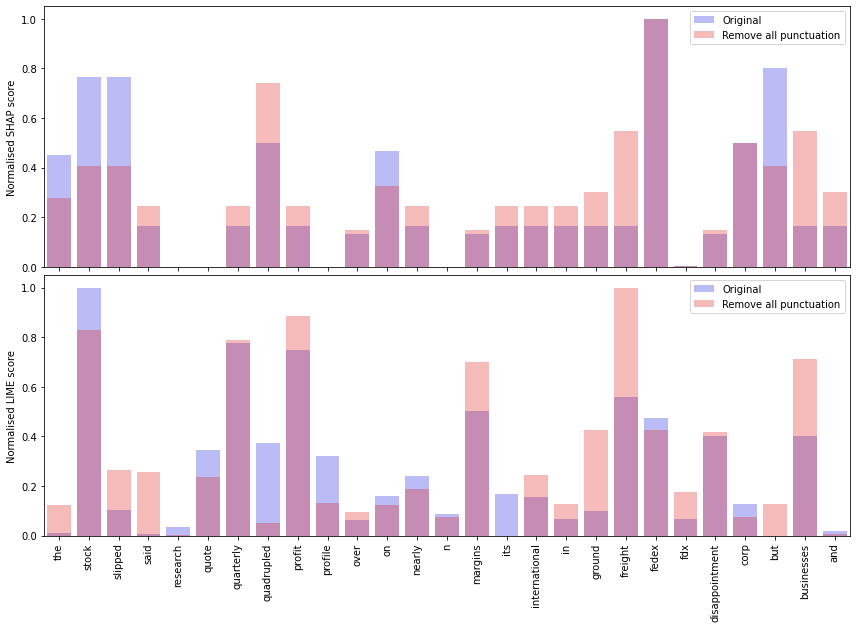

In [73]:
idx = 157

plot_examples(
    orig_tokens=(
        new_comp.loc[idx]['orig_tokens_SHAP_adj'], 
        new_comp.loc[idx]['orig_tokens_LIME']
    ), 
    orig_values=(
        new_comp.loc[idx]['orig_scores_SHAP_adj'], 
        new_comp.loc[idx]['orig_scores_LIME']
    ), 
    perturbation_tokens=(
        new_comp.loc[idx]['perturb_tokens_SHAP_adj'], 
        new_comp.loc[idx]['perturb_tokens_LIME']
    ), 
    perturbation_values=(
        new_comp.loc[idx]['perturb_scores_SHAP_adj'], 
        new_comp.loc[idx]['perturb_scores_LIME']
    ),
    perturbation='remove_all_punct',
    savefig=True,
    filename='SHAP_LIME_comp_AG.png'
)

### SST

#### Kirill results

In [74]:
with open('data/external/latest_kirill/bert_lime_sst_dev_500.pkl.gz', 'rb') as f:
    j = gzip.decompress(f.read())
results = pickle.loads(j)
print('loaded saved results', 'bert_lime_sst_dev_500')

loaded saved results bert_lime_sst_dev_500


In [75]:
vault = []

for i, info in tqdm(results.items()):
    for perturbation in info:
        pinfo = info[perturbation]
        if type(pinfo) != dict:
#            print(i, info, perturbation, pinfo)
            continue
        if 'spearman' not in pinfo:
            continue
        if 'orig_tokens' not in pinfo:
            continue
        vault += [dict(
            index=i,
            pinfo=pinfo,
            perturbation=perturbation,
            sentence_orig=pinfo['sentence_orig'],
            sentence=pinfo['sentence'],
            explanation=pinfo['exp'],
            topk=pinfo['top_5_intersect'],
            spearman=pinfo['spearman'],
        )]

100%|██████████| 500/500 [00:00<00:00, 144501.62it/s]


In [76]:
vault_df = pd.DataFrame(vault)
print(vault_df.shape)
vault_df.head()

(687, 8)


,index,pinfo,perturbation,sentence_orig,sentence,explanation,topk,spearman
0,5,"{'exp': ([0.11935536069294368, 0.1151401247756...",strip_punct,"( Lawrence bounces ) all over the stage , danc...","( lawrence bounces ) all over the stage , danc...","([0.11935536069294368, 0.11514012477569698, 0....",0.8,0.986087
1,5,"{'exp': ([0.15623125585936928, 0.1395827860277...",remove_commas,"( Lawrence bounces ) all over the stage , danc...",( lawrence bounces ) all over the stage danci...,"([0.15623125585936928, 0.13958278602775442, 0....",0.6,0.928696
2,5,"{'exp': ([0.1541473711310857, 0.13993620051037...",remove_all_punct,"( Lawrence bounces ) all over the stage , danc...",lawrence bounces all over the stage dancing...,"([0.1541473711310857, 0.13993620051037606, 0.0...",0.6,0.899130
3,5,"{'exp': ([0.12425742123855417, 0.1218721940375...",change_first_name,"( Lawrence bounces ) all over the stage , danc...","( David bounces ) all over the stage , dancing...","([0.12425742123855417, 0.1218721940375114, 0.0...",0.8,0.990435
4,6,"{'exp': ([0.06189154253603851, 0.0545155142054...",strip_punct,It 's a remarkably solid and subtly satirical ...,it ' s a remarkably solid and subtly satirical...,"([0.06189154253603851, 0.05451551420543605, 0....",0.4,0.754545


In [77]:
# vault_df.drop(columns=['sentence_orig', 'sentence', 'explanation'], inplace=True)

In [78]:
kirill_results = pd.json_normalize(vault_df['pinfo'])
print(kirill_results.shape)
kirill_results.head()

(687, 10)


,exp,top_5_intersect,orig_indices,orig_scores,orig_tokens,perturb_scores,perturb_tokens,spearman,sentence,sentence_orig
0,"([0.11935536069294368, 0.11514012477569698, 0....",0.8,"[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13,...","[-0.0422348143786807, -0.05516901087479692, 0....","[Lawrence, bounces, all, over, the, stage, dan...","[-0.04430807578197303, -0.05340747031070714, 0...","[lawrence, bounces, all, over, the, stage, dan...",0.986087,"( lawrence bounces ) all over the stage , danc...","( Lawrence bounces ) all over the stage , danc..."
1,"([0.15623125585936928, 0.13958278602775442, 0....",0.6,"[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13,...","[-0.0422348143786807, -0.05516901087479692, 0....","[Lawrence, bounces, all, over, the, stage, dan...","[-0.03444438711942043, -0.05161631694719572, 0...","[lawrence, bounces, all, over, the, stage, dan...",0.928696,( lawrence bounces ) all over the stage danci...,"( Lawrence bounces ) all over the stage , danc..."
2,"([0.1541473711310857, 0.13993620051037606, 0.0...",0.6,"[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13,...","[-0.0422348143786807, -0.05516901087479692, 0....","[Lawrence, bounces, all, over, the, stage, dan...","[-0.05085083404895343, -0.06003259943490336, 0...","[lawrence, bounces, all, over, the, stage, dan...",0.899130,lawrence bounces all over the stage dancing...,"( Lawrence bounces ) all over the stage , danc..."
3,"([0.12425742123855417, 0.1218721940375114, 0.0...",0.8,"[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13,...","[-0.0422348143786807, -0.05516901087479692, 0....","[Lawrence, bounces, all, over, the, stage, dan...","[-0.022136911794098938, -0.03962139956947861, ...","[David, bounces, all, over, the, stage, dancin...",0.990435,"( David bounces ) all over the stage , dancing...","( Lawrence bounces ) all over the stage , danc..."
4,"([0.06189154253603851, 0.05451551420543605, 0....",0.4,"[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10]","[-0.009560111320949855, 0.0056579475108381036,...","[It, s, a, remarkably, solid, and, subtly, sat...","[-0.0047334793772721715, 0.007464009468312571,...","[it, s, a, remarkably, solid, and, subtly, sat...",0.754545,it ' s a remarkably solid and subtly satirical...,It 's a remarkably solid and subtly satirical ...


In [79]:
kirill_results = pd.concat(
    (kirill_results, vault_df[['index', 'perturbation']]),
    axis=1
)
print(kirill_results.shape)
kirill_results.head()

(687, 12)


,exp,top_5_intersect,orig_indices,orig_scores,orig_tokens,perturb_scores,perturb_tokens,spearman,sentence,sentence_orig,index,perturbation
0,"([0.11935536069294368, 0.11514012477569698, 0....",0.8,"[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13,...","[-0.0422348143786807, -0.05516901087479692, 0....","[Lawrence, bounces, all, over, the, stage, dan...","[-0.04430807578197303, -0.05340747031070714, 0...","[lawrence, bounces, all, over, the, stage, dan...",0.986087,"( lawrence bounces ) all over the stage , danc...","( Lawrence bounces ) all over the stage , danc...",5,strip_punct
1,"([0.15623125585936928, 0.13958278602775442, 0....",0.6,"[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13,...","[-0.0422348143786807, -0.05516901087479692, 0....","[Lawrence, bounces, all, over, the, stage, dan...","[-0.03444438711942043, -0.05161631694719572, 0...","[lawrence, bounces, all, over, the, stage, dan...",0.928696,( lawrence bounces ) all over the stage danci...,"( Lawrence bounces ) all over the stage , danc...",5,remove_commas
2,"([0.1541473711310857, 0.13993620051037606, 0.0...",0.6,"[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13,...","[-0.0422348143786807, -0.05516901087479692, 0....","[Lawrence, bounces, all, over, the, stage, dan...","[-0.05085083404895343, -0.06003259943490336, 0...","[lawrence, bounces, all, over, the, stage, dan...",0.899130,lawrence bounces all over the stage dancing...,"( Lawrence bounces ) all over the stage , danc...",5,remove_all_punct
3,"([0.12425742123855417, 0.1218721940375114, 0.0...",0.8,"[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13,...","[-0.0422348143786807, -0.05516901087479692, 0....","[Lawrence, bounces, all, over, the, stage, dan...","[-0.022136911794098938, -0.03962139956947861, ...","[David, bounces, all, over, the, stage, dancin...",0.990435,"( David bounces ) all over the stage , dancing...","( Lawrence bounces ) all over the stage , danc...",5,change_first_name
4,"([0.06189154253603851, 0.05451551420543605, 0....",0.4,"[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10]","[-0.009560111320949855, 0.0056579475108381036,...","[It, s, a, remarkably, solid, and, subtly, sat...","[-0.0047334793772721715, 0.007464009468312571,...","[it, s, a, remarkably, solid, and, subtly, sat...",0.754545,it ' s a remarkably solid and subtly satirical...,It 's a remarkably solid and subtly satirical ...,6,strip_punct


In [80]:
kirill_results.drop(['exp', 'top_5_intersect', 'orig_indices', 'spearman', 'sentence'], axis=1, inplace=True)

In [81]:
k = 5

kirill_results['top_k_idx_orig'] = kirill_results.apply(
    lambda x: 
    set(
        np.argsort(
            -np.abs(x[f'orig_scores'])  # abs to ignore direction of importance value
        )[:k]
    ), 
    axis=1
)
kirill_results['top_k_idx_perturb'] = kirill_results.apply(
    lambda x: 
    set(
        np.argsort(
            -np.abs(x[f'perturb_scores'])
        )[:k]
    ), 
    axis=1
)

kirill_results['k_intersection'] = kirill_results.apply(lambda x: len(x['top_k_idx_orig'].intersection(x['top_k_idx_perturb'])) / k, axis=1)

kirill_results['spearman'] = kirill_results.apply(lambda x: spearmanr(x['orig_scores'], x[f'perturb_scores'])[0], axis=1)

Get original indices

In [82]:
agnews_index_map = dict(zip(range(500), pd.read_parquet('data/external/sst_dev_500.parquet').index))

In [83]:
kirill_results['index'] = kirill_results['index'].map(agnews_index_map)

In [84]:
kirill_results.head()

,orig_scores,orig_tokens,perturb_scores,perturb_tokens,sentence_orig,index,perturbation,top_k_idx_orig,top_k_idx_perturb,k_intersection,spearman
0,"[-0.0422348143786807, -0.05516901087479692, 0....","[Lawrence, bounces, all, over, the, stage, dan...","[-0.04430807578197303, -0.05340747031070714, 0...","[lawrence, bounces, all, over, the, stage, dan...","( Lawrence bounces ) all over the stage , danc...",16,strip_punct,"{2, 8, 9, 16, 18}","{2, 8, 9, 16, 18}",1.0,0.986087
1,"[-0.0422348143786807, -0.05516901087479692, 0....","[Lawrence, bounces, all, over, the, stage, dan...","[-0.03444438711942043, -0.05161631694719572, 0...","[lawrence, bounces, all, over, the, stage, dan...","( Lawrence bounces ) all over the stage , danc...",16,remove_commas,"{2, 8, 9, 16, 18}","{8, 9, 16, 17, 18}",0.8,0.928696
2,"[-0.0422348143786807, -0.05516901087479692, 0....","[Lawrence, bounces, all, over, the, stage, dan...","[-0.05085083404895343, -0.06003259943490336, 0...","[lawrence, bounces, all, over, the, stage, dan...","( Lawrence bounces ) all over the stage , danc...",16,remove_all_punct,"{2, 8, 9, 16, 18}","{8, 9, 13, 16, 18}",0.8,0.899130
3,"[-0.0422348143786807, -0.05516901087479692, 0....","[Lawrence, bounces, all, over, the, stage, dan...","[-0.022136911794098938, -0.03962139956947861, ...","[David, bounces, all, over, the, stage, dancin...","( Lawrence bounces ) all over the stage , danc...",16,change_first_name,"{2, 8, 9, 16, 18}","{2, 8, 9, 16, 18}",1.0,0.990435
4,"[-0.009560111320949855, 0.0056579475108381036,...","[It, s, a, remarkably, solid, and, subtly, sat...","[-0.0047334793772721715, 0.007464009468312571,...","[it, s, a, remarkably, solid, and, subtly, sat...",It 's a remarkably solid and subtly satirical ...,26,strip_punct,"{4, 5, 6, 8, 10}","{3, 4, 5, 6, 8}",0.8,0.754545


#### Steven results

In [85]:
steven_result_dict = pickle.load(open('data/processed/perturbation_df_dict_SST_BERT.pickle', 'rb'))

In [86]:
steven_result_dict.keys()

dict_keys(['strip_punct', 'remove_commas', 'remove_all_punct', 'change_first_name', 'change_last_name', 'change_location', 'add_typo', 'switch_gender', 'swap_adj'])

In [87]:
steven_results = pd.DataFrame()

In [88]:
for perturbation, df in steven_result_dict.items():

    df['index'] = df.index

    df['perturbation'] = perturbation

    df = df.copy()[['shap_orig_values', 'shap_orig_tokens', f'shap_{perturbation}_values', f'shap_{perturbation}_tokens', 'sentence', 'index', 'perturbation']]

    df.rename(columns={
        'shap_orig_values': 'orig_scores', 
        'shap_orig_tokens': 'orig_tokens', 
        f'shap_{perturbation}_values': 'perturb_scores', 
        f'shap_{perturbation}_tokens': 'perturb_tokens', 
        'sentence': 'sentence_orig', 
        'index': 'index', 
        'perturbation': 'perturbation'
    }, inplace=True)

    steven_results = steven_results.append(df)

In [89]:
steven_results.shape

(930, 7)

In [90]:
k = 5

steven_results['top_k_idx_orig'] = steven_results.apply(
    lambda x: 
    set(
        np.argsort(
            -np.abs(x[f'orig_scores'])  # abs to ignore direction of importance value
        )[:k]
    ), 
    axis=1
)
steven_results['top_k_idx_perturb'] = steven_results.apply(
    lambda x: 
    set(
        np.argsort(
            -np.abs(x[f'perturb_scores'])
        )[:k]
    ), 
    axis=1
)

steven_results['k_intersection'] = steven_results.apply(lambda x: len(x['top_k_idx_orig'].intersection(x['top_k_idx_perturb'])) / k, axis=1)

steven_results['spearman'] = steven_results.apply(lambda x: spearmanr(x['orig_scores'], x[f'perturb_scores'])[0], axis=1)

#### Merge results

In [91]:
comparison = kirill_results.merge(steven_results, on=['index', 'perturbation'], suffixes=['_LIME', '_SHAP'], how='inner')
comparison.head()

,orig_scores_LIME,orig_tokens_LIME,perturb_scores_LIME,perturb_tokens_LIME,sentence_orig_LIME,index,perturbation,top_k_idx_orig_LIME,top_k_idx_perturb_LIME,k_intersection_LIME,spearman_LIME,orig_scores_SHAP,orig_tokens_SHAP,perturb_scores_SHAP,perturb_tokens_SHAP,sentence_orig_SHAP,top_k_idx_orig_SHAP,top_k_idx_perturb_SHAP,k_intersection_SHAP,spearman_SHAP
0,"[-0.0422348143786807, -0.05516901087479692, 0....","[Lawrence, bounces, all, over, the, stage, dan...","[-0.04430807578197303, -0.05340747031070714, 0...","[lawrence, bounces, all, over, the, stage, dan...","( Lawrence bounces ) all over the stage , danc...",16,strip_punct,"{2, 8, 9, 16, 18}","{2, 8, 9, 16, 18}",1.0,0.986087,"[0.014154202537611127, 0.014154202537611127, 0...","[( , lawrence , bounce , ##s , ) , all , over ...","[0.015586297074332834, 0.015586297074332836, 0...","[( , lawrence , bounce , ##s , ) , all , over ...","( Lawrence bounces ) all over the stage , danc...","{5, 6, 7, 8, 9}","{0, 1, 2, 3, 4}",0.0,0.882245
1,"[-0.0422348143786807, -0.05516901087479692, 0....","[Lawrence, bounces, all, over, the, stage, dan...","[-0.022136911794098938, -0.03962139956947861, ...","[David, bounces, all, over, the, stage, dancin...","( Lawrence bounces ) all over the stage , danc...",16,change_first_name,"{2, 8, 9, 16, 18}","{2, 8, 9, 16, 18}",1.0,0.990435,"[0.014154202537611127, 0.014154202537611127, 0...","[( , lawrence , bounce , ##s , ) , all , over ...","[0.015534539753571153, 0.015534539753571155, 0...","[( , david , bounce , ##s , ) , all , over , t...","( Lawrence bounces ) all over the stage , danc...","{5, 6, 7, 8, 9}","{0, 1, 2, 3, 4}",0.0,0.861354
2,"[-0.009560111320949855, 0.0056579475108381036,...","[It, s, a, remarkably, solid, and, subtly, sat...","[-0.0047334793772721715, 0.007464009468312571,...","[it, s, a, remarkably, solid, and, subtly, sat...",It 's a remarkably solid and subtly satirical ...,26,strip_punct,"{4, 5, 6, 8, 10}","{3, 4, 5, 6, 8}",0.8,0.754545,"[0.009683545678853989, 0.009683545678853989, 0...","[it , ' , s , a , remarkably , solid , and , s...","[-0.0014894742829104266, -0.001489474282910426...","[it , ' , s , a , remarkably , solid , and , s...",It 's a remarkably solid and subtly satirical ...,"{3, 4, 5, 6, 7}","{3, 4, 5, 7, 8}",0.8,0.786278
3,"[-0.009560111320949855, 0.0056579475108381036,...","[It, s, a, remarkably, solid, and, subtly, sat...","[0.009239679407751932, 0.025059086518614278, 0...","[it, s, a, remarkably, solid, and, subtly, sat...",It 's a remarkably solid and subtly satirical ...,26,remove_all_punct,"{4, 5, 6, 8, 10}","{1, 3, 4, 5, 6}",0.6,0.718182,"[0.009683545678853989, 0.009683545678853989, 0...","[it , s , a , remarkably , solid , and , subtl...","[0.024501421302556992, 0.024501421302556992, 0...","[it , s , a , remarkably , solid , and , subtl...",It 's a remarkably solid and subtly satirical ...,"{2, 3, 4, 5, 6}","{2, 3, 4, 6, 7}",0.8,0.851085
4,"[-0.005329351210865757, -0.012194290094783808,...","[Not, only, is, Undercover, Brother, as, funny...","[-0.014569672408232658, -0.017961904023706825,...","[Not, only, is, Undercover, Brother, as, funny...","Not only is Undercover Brother as funny , if n...",30,change_first_name,"{16, 17, 19, 23, 25}","{16, 17, 19, 23, 25}",1.0,0.902859,"[0.005433942191302776, 0.005433942191302776, 0...","[not , only , is , undercover , brother , as ,...","[0.005603755824267864, 0.005603755824267864, 0...","[not , only , is , undercover , brother , as ,...","Not only is Undercover Brother as funny , if n...","{19, 20, 22, 23, 24}","{19, 20, 22, 23, 24}",1.0,0.980906


In [92]:
comparison.shape

(442, 20)

- LIME doesn't output scores for punctuation
- LIME preserves casing
- LIME drops duplicates of a token
- We adjust the SHAP tokens and scores to be consistent with LIME, allowing a comparison to be made
- We then sort the tokens for each explainer so that a comparison can be made

In [93]:
# Make token adjustments on perturbed SHAP outputs
adjusted_tokens = comparison.apply(
    lambda x: shap_adjustment(
        shap_token_list=x['perturb_tokens_SHAP'], 
        shap_val_list=x['perturb_scores_SHAP']
    ),
    axis=1
)

comparison['perturb_tokens_SHAP_adj'] = adjusted_tokens.apply(lambda x: x[0])
comparison['perturb_scores_SHAP_adj'] = adjusted_tokens.apply(lambda x: x[1])

In [94]:
# Make token adjustments on original SHAP outputs
adjusted_tokens = comparison.apply(
    lambda x: shap_adjustment(
        shap_token_list=x['orig_tokens_SHAP'], 
        shap_val_list=x['orig_scores_SHAP']
    ),
    axis=1
)

comparison['orig_tokens_SHAP_adj'] = adjusted_tokens.apply(lambda x: x[0])
comparison['orig_scores_SHAP_adj'] = adjusted_tokens.apply(lambda x: x[1])

In [95]:
# Filter examples where length of scores the ame between LIME and SHAP (may still be some inconsistencies in the implementations of the explainers)
new_comp = comparison.copy()[
    comparison['perturb_scores_LIME'].apply(len) == comparison['perturb_scores_SHAP_adj'].apply(len)
]

In [96]:
new_comp.head()

,orig_scores_LIME,orig_tokens_LIME,perturb_scores_LIME,perturb_tokens_LIME,sentence_orig_LIME,index,perturbation,top_k_idx_orig_LIME,top_k_idx_perturb_LIME,k_intersection_LIME,spearman_LIME,orig_scores_SHAP,orig_tokens_SHAP,perturb_scores_SHAP,perturb_tokens_SHAP,sentence_orig_SHAP,top_k_idx_orig_SHAP,top_k_idx_perturb_SHAP,k_intersection_SHAP,spearman_SHAP,perturb_tokens_SHAP_adj,perturb_scores_SHAP_adj,orig_tokens_SHAP_adj,orig_scores_SHAP_adj
0,"[-0.0422348143786807, -0.05516901087479692, 0....","[Lawrence, bounces, all, over, the, stage, dan...","[-0.04430807578197303, -0.05340747031070714, 0...","[lawrence, bounces, all, over, the, stage, dan...","( Lawrence bounces ) all over the stage , danc...",16,strip_punct,"{2, 8, 9, 16, 18}","{2, 8, 9, 16, 18}",1.0,0.986087,"[0.014154202537611127, 0.014154202537611127, 0...","[( , lawrence , bounce , ##s , ) , all , over ...","[0.015586297074332834, 0.015586297074332836, 0...","[( , lawrence , bounce , ##s , ) , all , over ...","( Lawrence bounces ) all over the stage , danc...","{5, 6, 7, 8, 9}","{0, 1, 2, 3, 4}",0.0,0.882245,"[all, and, bounces, brought, dancing, displayi...","[0.013876744220033288, 0.0015912988844017188, ...","[all, and, bounces, brought, dancing, displayi...","[0.01434142147190869, 0.0005392533106108507, 0..."
1,"[-0.0422348143786807, -0.05516901087479692, 0....","[Lawrence, bounces, all, over, the, stage, dan...","[-0.022136911794098938, -0.03962139956947861, ...","[David, bounces, all, over, the, stage, dancin...","( Lawrence bounces ) all over the stage , danc...",16,change_first_name,"{2, 8, 9, 16, 18}","{2, 8, 9, 16, 18}",1.0,0.990435,"[0.014154202537611127, 0.014154202537611127, 0...","[( , lawrence , bounce , ##s , ) , all , over ...","[0.015534539753571153, 0.015534539753571155, 0...","[( , david , bounce , ##s , ) , all , over , t...","( Lawrence bounces ) all over the stage , danc...","{5, 6, 7, 8, 9}","{0, 1, 2, 3, 4}",0.0,0.861354,"[all, and, bounces, brought, dancing, david, d...","[0.015270090335980058, 0.0004635133470098178, ...","[all, and, bounces, brought, dancing, displayi...","[0.01434142147190869, 0.0005392533106108507, 0..."
2,"[-0.009560111320949855, 0.0056579475108381036,...","[It, s, a, remarkably, solid, and, subtly, sat...","[-0.0047334793772721715, 0.007464009468312571,...","[it, s, a, remarkably, solid, and, subtly, sat...",It 's a remarkably solid and subtly satirical ...,26,strip_punct,"{4, 5, 6, 8, 10}","{3, 4, 5, 6, 8}",0.8,0.754545,"[0.009683545678853989, 0.009683545678853989, 0...","[it , ' , s , a , remarkably , solid , and , s...","[-0.0014894742829104266, -0.001489474282910426...","[it , ' , s , a , remarkably , solid , and , s...",It 's a remarkably solid and subtly satirical ...,"{3, 4, 5, 6, 7}","{3, 4, 5, 7, 8}",0.8,0.786278,"[a, and, de, force, it, remarkably, s, satiric...","[0.05848685620973508, 0.015391866366068523, -0...","[a, and, de, force, it, remarkably, s, satiric...","[0.05563721215973298, 0.03857804036566189, -0...."
3,"[-0.009560111320949855, 0.0056579475108381036,...","[It, s, a, remarkably, solid, and, subtly, sat...","[0.009239679407751932, 0.025059086518614278, 0...","[it, s, a, remarkably, solid, and, subtly, sat...",It 's a remarkably solid and subtly satirical ...,26,remove_all_punct,"{4, 5, 6, 8, 10}","{1, 3, 4, 5, 6}",0.6,0.718182,"[0.009683545678853989, 0.009683545678853989, 0...","[it , s , a , remarkably , solid , and , subtl...","[0.024501421302556992, 0.024501421302556992, 0...","[it , s , a , remarkably , solid , and , subtl...",It 's a remarkably solid and subtly satirical ...,"{2, 3, 4, 5, 6}","{2, 3, 4, 6, 7}",0.8,0.851085,"[a, and, de, force, it, remarkably, s, satiric...","[0.05462919110432267, 0.013048797224958737, 0....","[a, and, de, force, it, remarkably, s, satiric...","[0.05563721215973298, 0.03857804036566189, -0...."
6,"[0.05343794520528431, 0.0864034018539853, 0.09...","[A, fast, funny, highly, enjoyable, movie]","[0.05177868199818985, 0.10056804430961622, 0.0...","[a, fast, fun

In [97]:
(new_comp['perturb_scores_SHAP_adj'].apply(len) == new_comp['orig_scores_SHAP_adj'].apply(len)).value_counts()

True     359
False      1
dtype: int64

In [98]:
new_comp = new_comp[new_comp['perturb_scores_SHAP_adj'].apply(len) == new_comp['orig_scores_SHAP_adj'].apply(len)]

In [99]:
new_comp.shape

(359, 24)

In [100]:
new_comp = new_comp[
    ['index', 'perturbation', 'orig_scores_LIME', 'orig_tokens_LIME', 'perturb_tokens_LIME', 'perturb_scores_LIME', 'orig_tokens_SHAP_adj', 'orig_scores_SHAP_adj', 'perturb_tokens_SHAP_adj', 'perturb_scores_SHAP_adj', 'k_intersection_SHAP', 'spearman_SHAP', 'k_intersection_LIME', 'spearman_LIME']
]

In [101]:
new_comp.head()

,index,perturbation,orig_scores_LIME,orig_tokens_LIME,perturb_tokens_LIME,perturb_scores_LIME,orig_tokens_SHAP_adj,orig_scores_SHAP_adj,perturb_tokens_SHAP_adj,perturb_scores_SHAP_adj,k_intersection_SHAP,spearman_SHAP,k_intersection_LIME,spearman_LIME
0,16,strip_punct,"[-0.0422348143786807, -0.05516901087479692, 0....","[Lawrence, bounces, all, over, the, stage, dan...","[lawrence, bounces, all, over, the, stage, dan...","[-0.04430807578197303, -0.05340747031070714, 0...","[all, and, bounces, brought, dancing, displayi...","[0.01434142147190869, 0.0005392533106108507, 0...","[all, and, bounces, brought, dancing, displayi...","[0.013876744220033288, 0.0015912988844017188, ...",0.0,0.882245,1.0,0.986087
1,16,change_first_name,"[-0.0422348143786807, -0.05516901087479692, 0....","[Lawrence, bounces, all, over, the, stage, dan...","[David, bounces, all, over, the, stage, dancin...","[-0.022136911794098938, -0.03962139956947861, ...","[all, and, bounces, brought, dancing, displayi...","[0.01434142147190869, 0.0005392533106108507, 0...","[all, and, bounces, brought, dancing, david, d...","[0.015270090335980058, 0.0004635133470098178, ...",0.0,0.861354,1.0,0.990435
2,26,strip_punct,"[-0.009560111320949855, 0.0056579475108381036,...","[It, s, a, remarkably, solid, and, subtly, sat...","[it, s, a, remarkably, solid, and, subtly, sat...","[-0.0047334793772721715, 0.007464009468312571,...","[a, and, de, force, it, remarkably, s, satiric...","[0.05563721215973298, 0.03857804036566189, -0....","[a, and, de, force, it, remarkably, s, satiric...","[0.05848685620973508, 0.015391866366068523, -0...",0.8,0.786278,0.8,0.754545
3,26,remove_all_punct,"[-0.009560111320949855, 0.0056579475108381036,...","[It, s, a, remarkably, solid, and, subtly, sat...","[it, s, a, remarkably, solid, and, subtly, sat...","[0.009239679407751932, 0.025059086518614278, 0...","[a, and, de, force, it, remarkably, s, satiric...","[0.05563721215973298, 0.03857804036566189, -0....","[a, and, de, force, it, remarkably, s, satiric...","[0.05462919110432267, 0.013048797224958737, 0....",0.8,0.851085,0.6,0.718182
6,46,strip_punct,"[0.05343794520528431, 0.0864034018539853, 0.09...","[A, fast, funny, highly, enjoyable, movie]","[a, fast, funny, highly, enjoyable, movie]","[0.05177868199818985, 0.10056804430961622, 0.0...","[a, enjoyable, fast, funny, highly, movie]","[0.04689674607167641, 0.09211247228085995, 0.0...","[a, enjoyable, fast, funny, highly, movie]","[0.043236930233736835, 0.11228085774928331, 0....",1.0,0.993651,1.0,0.885714


In [102]:
# Lower case LIME tokens to be consistent with SHAP
new_comp['perturb_tokens_LIME'] = new_comp.apply(lambda x: [w.lower() for w in x['perturb_tokens_LIME']], axis=1)
new_comp['orig_tokens_LIME'] = new_comp.apply(lambda x: [w.lower() for w in x['orig_tokens_LIME']], axis=1)

In [103]:
# Find idx order corresponding to ordered tokens for LIME and SHAP
new_comp['token_LIME_idx_order_perturb'] = new_comp.apply(lambda x: np.argsort(x['perturb_tokens_LIME']), axis=1)
new_comp['token_SHAP_idx_order_perturb'] = new_comp.apply(lambda x: np.argsort(x['perturb_tokens_SHAP_adj']), axis=1)

In [104]:
new_comp['perturb_tokens_LIME'] = new_comp.apply(lambda x: np.array(x['perturb_tokens_LIME'])[x['token_LIME_idx_order_perturb']], axis=1)
new_comp['perturb_scores_LIME'] = new_comp.apply(lambda x: np.array(x['perturb_scores_LIME'])[x['token_LIME_idx_order_perturb']], axis=1)

In [105]:
new_comp['perturb_tokens_SHAP_adj'] = new_comp.apply(lambda x: np.array(x['perturb_tokens_SHAP_adj'])[x['token_SHAP_idx_order_perturb']], axis=1)
new_comp['perturb_scores_SHAP_adj'] = new_comp.apply(lambda x: np.array(x['perturb_scores_SHAP_adj'])[x['token_SHAP_idx_order_perturb']], axis=1)

In [106]:
# Find idx order corresponding to ordered tokens for LIME and SHAP
new_comp['token_LIME_idx_order_orig'] = new_comp.apply(lambda x: np.argsort(x['orig_tokens_LIME']), axis=1)
new_comp['token_SHAP_idx_order_orig'] = new_comp.apply(lambda x: np.argsort(x['orig_tokens_SHAP_adj']), axis=1)

In [107]:
new_comp['orig_tokens_LIME'] = new_comp.apply(lambda x: np.array(x['orig_tokens_LIME'])[x['token_LIME_idx_order_orig']], axis=1)
new_comp['orig_scores_LIME'] = new_comp.apply(lambda x: np.array(x['orig_scores_LIME'])[x['token_LIME_idx_order_orig']], axis=1)

In [108]:
new_comp['orig_tokens_SHAP_adj'] = new_comp.apply(lambda x: np.array(x['orig_tokens_SHAP_adj'])[x['token_SHAP_idx_order_orig']], axis=1)
new_comp['orig_scores_SHAP_adj'] = new_comp.apply(lambda x: np.array(x['orig_scores_SHAP_adj'])[x['token_SHAP_idx_order_orig']], axis=1)

### Compute k-intersection and Spearman between explainers

In [109]:
k = 5

new_comp['top_k_idx_LIME'] = new_comp.apply(
    lambda x: 
    set(
        np.argsort(
            -np.abs(x[f'perturb_scores_LIME'])  # abs to ignore direction of importance value
        )[:k]
    ), 
    axis=1
)
new_comp['top_k_idx_SHAP'] = new_comp.apply(
    lambda x: 
    set(
        np.argsort(
            -np.abs(x[f'perturb_scores_SHAP_adj'])
        )[:k]
    ), 
    axis=1
)

new_comp['k_intersection'] = new_comp.apply(lambda x: len(x['top_k_idx_LIME'].intersection(x['top_k_idx_SHAP'])) / k, axis=1)

new_comp['spearman'] = new_comp.apply(lambda x: spearmanr(x['perturb_scores_LIME'], x[f'perturb_scores_SHAP_adj'])[0], axis=1)

In [110]:
new_comp.head()

,index,perturbation,orig_scores_LIME,orig_tokens_LIME,perturb_tokens_LIME,perturb_scores_LIME,orig_tokens_SHAP_adj,orig_scores_SHAP_adj,perturb_tokens_SHAP_adj,perturb_scores_SHAP_adj,k_intersection_SHAP,spearman_SHAP,k_intersection_LIME,spearman_LIME,token_LIME_idx_order_perturb,token_SHAP_idx_order_perturb,token_LIME_idx_order_orig,token_SHAP_idx_order_orig,top_k_idx_LIME,top_k_idx_SHAP,k_intersection,spearman
0,16,strip_punct,"[0.0833306063759102, -0.05702498353830321, -0....","[all, and, bounces, brought, dancing, displayi...","[all, and, bounces, brought, dancing, displayi...","[0.07924728005316646, -0.04375063415602953, -0...","[all, and, bounces, brought, dancing, displayi...","[0.01434142147190869, 0.0005392533106108507, 0...","[all, and, bounces, brought, dancing, displayi...","[0.013876744220033288, 0.0015912988844017188, ...",0.0,0.882245,1.0,0.986087,"[2, 12, 1, 18, 6, 14, 11, 20, 22, 13, 19, 10, ...","[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13,...","[2, 12, 1, 18, 6, 14, 11, 20, 22, 13, 19, 10, ...","[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13,...","{0, 3, 14, 19, 20}","{0, 2, 13, 15, 18}",0.2,0.184818
1,16,change_first_name,"[0.0833306063759102, -0.05702498353830321, -0....","[all, and, bounces, brought, dancing, displayi...","[all, and, bounces, brought, dancing, david, d...","[0.09520472935994632, -0.0557818087637203, -0....","[all, and, bounces, brought, dancing, displayi...","[0.01434142147190869, 0.0005392533106108507, 0...","[all, and, bounces, brought, dancing, david, d...","[0.015270090335980058, 0.0004635133470098178, ...",0.0,0.861354,1.0,0.990435,"[2, 12, 1, 18, 6, 0, 14, 11, 20, 22, 13, 19, 1...","[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13,...","[2, 12, 1, 18, 6, 14, 11, 20, 22, 13, 19, 10, ...","[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13,...","{0, 3, 14, 19, 20}","{0, 2, 5, 15, 18}",0.2,-0.009285
2,26,strip_punct,"[-0.009029416244877915, -0.043423388930198294,...","[a, and, de, force, it, remarkably, s, satiric...","[a, and, de, force, it, remarkably, s, satiric...","[-0.007618531079117087, -0.0502222198808802, 0...","[a, and, de, force, it, remarkably, s, satiric...","[0.05563721215973298, 0.03857804036566189, -0....","[a, and, de, force, it, remarkably, s, satiric...","[0.05848685620973508, 0.015391866366068523, -0...",0.8,0.786278,0.8,0.754545,"[2, 5, 9, 10, 0, 3, 1, 7, 4, 6, 8]","[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10]","[2, 5, 9, 10, 0, 3, 1, 7, 4, 6, 8]","[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10]","{1, 5, 8, 9, 10}","{0, 5, 7, 8, 9}",0.6,0.511570
3,26,remove_all_punct,"[-0.009029416244877915, -0.043423388930198294,...","[a, and, de, force, it, remarkably, s, satiric...","[a, and, de, force, it, remarkably, s, satiric...","[0.010604180963942444, -0.041370527588949844, ...","[a, and, de, force, it, remarkably, s, satiric...","[0.05563721215973298, 0.03857804036566189, -0....","[a, and, de, force, it, remarkably, s, satiric...","[0.05462919110432267, 0.013048797224958737, 0....",0.8,0.851085,0.6,0.718182,"[2, 5, 9, 10, 0, 3, 1, 7, 4, 6, 8]","[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10]","[2, 5, 9, 10, 0, 3, 1, 7, 4, 6, 8]","[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10]","{1, 5, 6, 8, 9}","{0, 5, 7, 8, 9}",0.6,0.771463
6,46,strip_punct,"[0.05343794520528431, 0.19879312024551066, 0.0...","[a, enjoyable, fast, funny, highly, movie]","[a, enjoyable, fast, funny, highly, movie]","[0.05177868199818985, 0.19149305636868424, 0.1...","[a, enjoyable, fast, funny, highly, movie]","[0.04689674607167641, 0.09211247228085995, 0.0...","[a, enjoyable, fast, funny, highly, movie]","[0.043236930233736835, 0.11228085774928331, 0....",1.0,0.993651,1.0,0.885714,"[0, 4, 1, 2, 3, 5]","[0, 1, 2, 3, 4, 5]","[0, 4, 1, 2, 3, 5]","[0, 1, 2, 3, 4, 5]","{1, 2, 3, 4, 5}","{0, 1, 2, 4, 5}",0.8,0.724714


In [111]:
# Filter non-name change perturbations - others are non-deterministic
new_comp = new_comp[new_comp['perturbation'].isin(['strip_punct', 'remove_commas', 'remove_all_punct', 'switch_gender'])]

In [112]:
new_comp.head()

,index,perturbation,orig_scores_LIME,orig_tokens_LIME,perturb_tokens_LIME,perturb_scores_LIME,orig_tokens_SHAP_adj,orig_scores_SHAP_adj,perturb_tokens_SHAP_adj,perturb_scores_SHAP_adj,k_intersection_SHAP,spearman_SHAP,k_intersection_LIME,spearman_LIME,token_LIME_idx_order_perturb,token_SHAP_idx_order_perturb,token_LIME_idx_order_orig,token_SHAP_idx_order_orig,top_k_idx_LIME,top_k_idx_SHAP,k_intersection,spearman
0,16,strip_punct,"[0.0833306063759102, -0.05702498353830321, -0....","[all, and, bounces, brought, dancing, displayi...","[all, and, bounces, brought, dancing, displayi...","[0.07924728005316646, -0.04375063415602953, -0...","[all, and, bounces, brought, dancing, displayi...","[0.01434142147190869, 0.0005392533106108507, 0...","[all, and, bounces, brought, dancing, displayi...","[0.013876744220033288, 0.0015912988844017188, ...",0.0,0.882245,1.0,0.986087,"[2, 12, 1, 18, 6, 14, 11, 20, 22, 13, 19, 10, ...","[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13,...","[2, 12, 1, 18, 6, 14, 11, 20, 22, 13, 19, 10, ...","[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13,...","{0, 3, 14, 19, 20}","{0, 2, 13, 15, 18}",0.2,0.184818
2,26,strip_punct,"[-0.009029416244877915, -0.043423388930198294,...","[a, and, de, force, it, remarkably, s, satiric...","[a, and, de, force, it, remarkably, s, satiric...","[-0.007618531079117087, -0.0502222198808802, 0...","[a, and, de, force, it, remarkably, s, satiric...","[0.05563721215973298, 0.03857804036566189, -0....","[a, and, de, force, it, remarkably, s, satiric...","[0.05848685620973508, 0.015391866366068523, -0...",0.8,0.786278,0.8,0.754545,"[2, 5, 9, 10, 0, 3, 1, 7, 4, 6, 8]","[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10]","[2, 5, 9, 10, 0, 3, 1, 7, 4, 6, 8]","[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10]","{1, 5, 8, 9, 10}","{0, 5, 7, 8, 9}",0.6,0.511570
3,26,remove_all_punct,"[-0.009029416244877915, -0.043423388930198294,...","[a, and, de, force, it, remarkably, s, satiric...","[a, and, de, force, it, remarkably, s, satiric...","[0.010604180963942444, -0.041370527588949844, ...","[a, and, de, force, it, remarkably, s, satiric...","[0.05563721215973298, 0.03857804036566189, -0....","[a, and, de, force, it, remarkably, s, satiric...","[0.05462919110432267, 0.013048797224958737, 0....",0.8,0.851085,0.6,0.718182,"[2, 5, 9, 10, 0, 3, 1, 7, 4, 6, 8]","[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10]","[2, 5, 9, 10, 0, 3, 1, 7, 4, 6, 8]","[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10]","{1, 5, 6, 8, 9}","{0, 5, 7, 8, 9}",0.6,0.771463
6,46,strip_punct,"[0.05343794520528431, 0.19879312024551066, 0.0...","[a, enjoyable, fast, funny, highly, movie]","[a, enjoyable, fast, funny, highly, movie]","[0.05177868199818985, 0.19149305636868424, 0.1...","[a, enjoyable, fast, funny, highly, movie]","[0.04689674607167641, 0.09211247228085995, 0.0...","[a, enjoyable, fast, funny, highly, movie]","[0.043236930233736835, 0.11228085774928331, 0....",1.0,0.993651,1.0,0.885714,"[0, 4, 1, 2, 3, 5]","[0, 1, 2, 3, 4, 5]","[0, 4, 1, 2, 3, 5]","[0, 1, 2, 3, 4, 5]","{1, 2, 3, 4, 5}","{0, 1, 2, 4, 5}",0.8,0.724714
7,46,remove_commas,"[0.05343794520528431, 0.19879312024551066, 0.0...","[a, enjoyable, fast, funny, highly, movie]","[a, enjoyable, fast, funny, highly, movie]","[0.06022794665420344, 0.1358939720031797, 0.03...","[a, enjoyable, fast, funny, highly, movie]","[0.04689674607167641, 0.09211247228085995, 0.0...","[a, enjoyable, fast, funny, highly, movie]","[0.0496896356344223, 0.06735126534476876, 0.04...",0.8,0.527778,0.8,0.714286,"[0, 4, 1, 2, 3, 5]","[0, 1, 2, 3, 4, 5]","[0, 4, 1, 2, 3, 5]","[0, 1, 2, 3, 4, 5]","{0, 1, 3, 4, 5}","{0, 1, 2, 3, 5}",0.8,0.264820


In [113]:
new_comp.groupby('perturbation').count()['index']

perturbation
remove_all_punct     93
remove_commas        75
strip_punct         146
switch_gender        12
Name: index, dtype: int64

In [114]:
new_comp['k_intersection'].mean()

0.4368098159509203

In [115]:
new_comp['k_intersection'].std()

0.22159062885342948

In [116]:
new_comp['spearman'].mean()

0.2810622878547033

In [117]:
new_comp['spearman'].std()

0.25082606432027454

In [118]:
new_comp[(new_comp[['k_intersection_LIME', 'k_intersection_SHAP']].mean(axis=1) < 0.7) & (new_comp['k_intersection'] < 0.7)].sample(n=1)

,index,perturbation,orig_scores_LIME,orig_tokens_LIME,perturb_tokens_LIME,perturb_scores_LIME,orig_tokens_SHAP_adj,orig_scores_SHAP_adj,perturb_tokens_SHAP_adj,perturb_scores_SHAP_adj,k_intersection_SHAP,spearman_SHAP,k_intersection_LIME,spearman_LIME,token_LIME_idx_order_perturb,token_SHAP_idx_order_perturb,token_LIME_idx_order_orig,token_SHAP_idx_order_orig,top_k_idx_LIME,top_k_idx_SHAP,k_intersection,spearman
222,617,strip_punct,"[0.0009318910319102626, 0.04310820163260644, 0...","[and, away, badly, characters, drawn, featurin...","[and, away, badly, characters, drawn, featurin...","[-0.004872104373636168, 0.046630401582565484, ...","[and, away, badly, characters, drawn, featurin...","[0.02329260129481554, -0.005002284919222196, 0...","[and, away, badly, characters, drawn, featurin...","[0.013015137612819671, -0.0054592027018467585,...",0.4,0.9207,0.8,0.851128,"[7, 6, 12, 14, 13, 10, 5, 18, 0, 4, 16, 19, 2,...","[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13,...","[7, 6, 12, 14, 13, 10, 5, 18, 0, 4, 16, 19, 2,...","[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13,...","{1, 2, 7, 11, 16}","{7, 10, 11, 15, 17}",0.4,0.395932


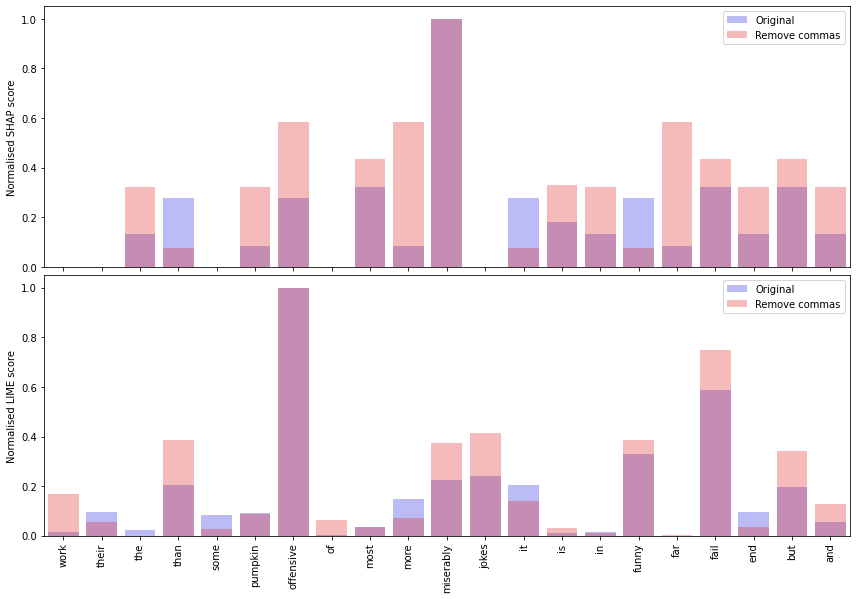

In [120]:
idx = 435

plot_examples(
    orig_tokens=(new_comp.loc[idx]['orig_tokens_SHAP_adj'], new_comp.loc[idx]['orig_tokens_LIME']), 
    orig_values=(new_comp.loc[idx]['orig_scores_SHAP_adj'], new_comp.loc[idx]['orig_scores_LIME']), 
    perturbation_tokens=(new_comp.loc[idx]['perturb_tokens_SHAP_adj'], new_comp.loc[idx]['perturb_tokens_LIME']), 
    perturbation_values=(new_comp.loc[idx]['perturb_scores_SHAP_adj'], new_comp.loc[idx]['perturb_scores_LIME']),
    perturbation='remove_commas',
    savefig=True,
    filename='SHAP_LIME_comp_SST.png'
)